# Case Study on Loan Applications

##### Done by 


| Name | email_id    | Mobile |
|--- |----------| ------|
| Abhijeet Srivastava | abhijeet.s92@outlook.com | 9811173678 |
| Gilla Saiteja | saitejagilla@gmail.com       |  9247912611 |



##### Edited: 31 August 2021
##### Run: 24 August 2022

## Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
1.	Approved: The Company has approved loan Application
2.	Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3.	Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4.	Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

### Data Understanding

This dataset has 3 files as explained below: 
1. 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.


### Results Expected 
- Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.
- Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.
- Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.
- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  
- Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

There is one Ipython notebook which clearly explain the thought process behind our analysis (either in comments of markdown text), code and relevant plots. 

There is also a presentation file (in PDF format) and contains the points discussed above with the necessary visualisations (done in Python). 


### Filter out warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Importing the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools

### Changing pandas display settings for better readibility 

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Reading the 3 files

In [5]:
#main file
app = pd.read_csv(r'application_data.csv')
# previous application file
pre_app = pd.read_csv(r'previous_application.csv')
#column description
col_descr = pd.read_csv(r'columns_description.csv', encoding='cp1252')

Note: 
- encoding added due to UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 1127: invalid start byte while reading columns_description.csv.
- Resolution found https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte

In [6]:
print ("application_data    :",app.shape)
print ("previous_application:",pre_app.shape)
print ("columns_description :",col_descr.shape)

application_data    : (307511, 122)
previous_application: (1670214, 37)
columns_description : (160, 5)


### Exploring and Cleaning application_data.csv and previous_application.csv

In [7]:
#looking into top 5 rows
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [8]:
#looking into top 5 rows
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

#### Checking for the count of NA values in both dataframes

In [9]:
app.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [11]:
pre_app.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

#### Removing columns with more than 40% missing values

In [12]:
application_data = app[app.columns[(app.isnull().sum()/len(app))*100 <  40]]
print("Before removing columns: ",app.shape)
print("After removing columns: ",application_data.shape)

Before removing columns:  (307511, 122)
After removing columns:  (307511, 73)


49 columns have been dropped from app df

In [13]:
previous_application_data = pre_app[pre_app.columns[(pre_app.isnull().sum()/len(pre_app))*100 < 40]]
print("Before removing columns: ",pre_app.shape)
print("After removing columns: ",previous_application_data.shape)

Before removing columns:  (1670214, 37)
After removing columns:  (1670214, 26)


11 columns have been dropped from pre_app df

#### Finding the percentage of missing values in each column in both dfs

In [14]:
application_data_missing = application_data.isnull().sum() * 100 / len(application_data)
application_data_missing.sort_values(ascending=False).head(25)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


18 columns have missing values, these will be further explored to decide how to replace the missing values

In [15]:
previous_application_data_missing = previous_application_data.isnull().sum() * 100 / len(previous_application_data)
previous_application_data_missing.sort_values(ascending  = False).head(10)

AMT_GOODS_PRICE         23.081773
AMT_ANNUITY             22.286665
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
AMT_CREDIT               0.000060
CODE_REJECT_REASON       0.000000
NAME_YIELD_GROUP         0.000000
NAME_SELLER_INDUSTRY     0.000000
SELLERPLACE_AREA         0.000000
CHANNEL_TYPE             0.000000
dtype: float64

5 columns have missing values, these will be further explored to decide how to replace the missing values

#### Working on columns with >10% missing values in application_data df 

In [16]:
application_data_missing[application_data_missing>10]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

#### Setting up a for loop to print the value counts, number and percentage of missing values and describe() for all columns with >10% missing values

In [17]:
for i in application_data_missing[application_data_missing>10].index.tolist():
    print(i,'\n',application_data[i].value_counts())
    print('\n',"Number of Missing values: ",application_data[i].isnull().sum())
    print('\n',"Missing value percentage: ",application_data[i].isnull().sum() * 100 / len(application_data))
    print('\n',"Describe",application_data[i].describe())
    print('\n'*3)
    print("="*50)

OCCUPATION_TYPE 
 Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

 Number of Missing values:  96391

 Missing value percentage:  31.345545362604916

 Describe count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object




EXT_SOURCE_3 
 0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556 

Column: OCCUPATION_TYPE has 96391 missing values(~31%) and we can't replace the 31% missing values with the mode (Laborers) as it might skew the data, can add a new category called 'Unknown' for these missing values

In [18]:
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [19]:
application_data['OCCUPATION_TYPE'].isna().sum()
#verifying that the replaced worked

0

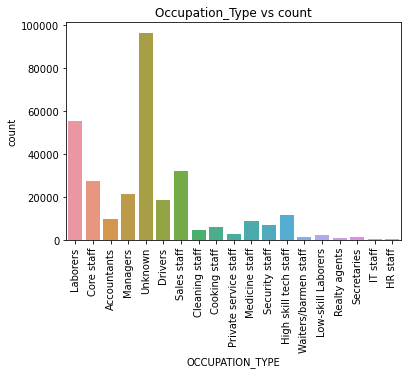

In [20]:
#Plotting Occupation_Type
sns.countplot(application_data['OCCUPATION_TYPE'])
plt.title('Occupation_Type vs count')
plt.xticks(rotation = 90)
plt.show()

#### Looking at the remaining columns with missing values

For EXT_SOURCE_3

- Describe count    246546.000000
- mean          0.510853
- std           0.194844
- min           0.000527
- 25%           0.370650
- 50%           0.535276
- 75%           0.669057
- max           0.896010

mean and median are very close, replacing missing values with mean

In [21]:
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].mean(), inplace=True)

In [22]:
application_data['EXT_SOURCE_3'].isna().sum()

0

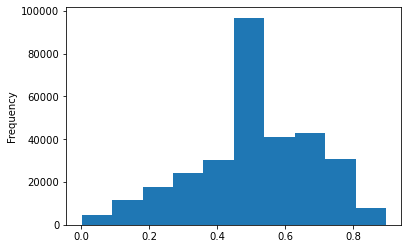

In [23]:
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

Columns:
- AMT_REQ_CREDIT_BUREAU_HOUR 
- AMT_REQ_CREDIT_BUREAU_DAY  
- AMT_REQ_CREDIT_BUREAU_WEEK 
- AMT_REQ_CREDIT_BUREAU_MON 
- AMT_REQ_CREDIT_BUREAU_QRT 
- AMT_REQ_CREDIT_BUREAU_YEAR 

are numerical columns wit discrete values, so can't replace with median or mean. Will replace them with mode

In [24]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [25]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode().iloc[0])

In [26]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

0

In [27]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [28]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'] = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode().iloc[0])

In [29]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum()

0

In [30]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode().iloc[0])
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

0

In [31]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'] = application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode().iloc[0])
application_data.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

0

In [32]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])
application_data.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

In [33]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode().iloc[0])
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

#### Working on columns with <10% missing values in application_data df

In [34]:
application_data_missing_0to10 = application_data_missing[(0<application_data_missing) & (application_data_missing<10)].sort_values(ascending = False)
application_data_missing_0to10

NAME_TYPE_SUITE             0.420148
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [35]:
for i in application_data_missing_0to10.index.tolist():
    print(i,'\n',application_data[i].value_counts())
    print('\n',"Number of Missing values: ",application_data[i].isnull().sum())
    print('\n',"Missing value percentage: ",application_data[i].isnull().sum() * 100 / len(application_data))
    print('\n',"Describe:",'\n',application_data[i].describe())
    print('\n'*3)
    print("="*50)

NAME_TYPE_SUITE 
 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

 Number of Missing values:  1292

 Missing value percentage:  0.42014757195677555

 Describe: 
 count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object




OBS_30_CNT_SOCIAL_CIRCLE 
 0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0   

In [36]:
#For Column NAME_TYPE_SUITE, replacing missing values with mode
application_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [37]:
application_data.NAME_TYPE_SUITE = application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.mode().iloc[0])

In [38]:
application_data.NAME_TYPE_SUITE.isna().sum()

0

Columns:
- OBS_30_CNT_SOCIAL_CIRCLE    
- DEF_30_CNT_SOCIAL_CIRCLE    
- OBS_60_CNT_SOCIAL_CIRCLE    
- DEF_60_CNT_SOCIAL_CIRCLE    

are being replaced with mode after observing the value_counts()

In [39]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
dtype: float64

In [40]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])

In [41]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

In [42]:
application_data.DEF_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
dtype: float64

In [43]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode().iloc[0])
application_data.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

In [44]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'] = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])
application_data.OBS_60_CNT_SOCIAL_CIRCLE.isna().sum()

0

In [45]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'] = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode().iloc[0])
application_data.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

Based on the describe() the missing values in the following columns were repalced with :
- EXT_SOURCE_2 median value             
- AMT_GOODS_PRICE median value           
- AMT_ANNUITY median value                  
- CNT_FAM_MEMBERS median value              
- DAYS_LAST_PHONE_CHANGE no replacement as only one row has missing value    


In [46]:
application_data.EXT_SOURCE_2 = application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median())

In [47]:
application_data.EXT_SOURCE_2.isna().sum()

0

In [48]:
application_data.AMT_GOODS_PRICE = application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median())

In [49]:
application_data.AMT_GOODS_PRICE.isna().sum()

0

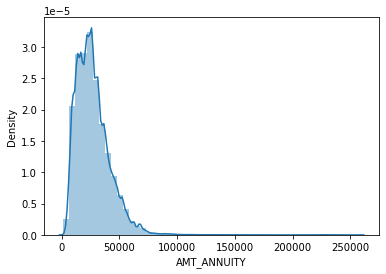

In [50]:
sns.distplot(application_data['AMT_ANNUITY'])
plt.show();

In [51]:
application_data.AMT_ANNUITY = application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median())

In [52]:
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.median())

In [53]:
application_data.AMT_ANNUITY.isna().sum()

0

In [54]:
application_data.CNT_FAM_MEMBERS.isna().sum()

0

In [55]:
application_data.isna().sum().sort_values(ascending=False)

DAYS_LAST_PHONE_CHANGE         1
REG_CITY_NOT_WORK_CITY         0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_2                0
SK_ID_CURR                     0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_3                   0
EXT_SOURCE_2                   0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_20               0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
FLAG_DOCUMENT_21               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_18               0
FLAG_DOCUM

application_data df is now clean

#### Cleaning previous_application df

In [56]:
previous_application_data_missing = previous_application_data_missing.sort_values(ascending  = False).head(12)
previous_application_data_missing

AMT_GOODS_PRICE         23.081773
AMT_ANNUITY             22.286665
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
AMT_CREDIT               0.000060
CODE_REJECT_REASON       0.000000
NAME_YIELD_GROUP         0.000000
NAME_SELLER_INDUSTRY     0.000000
SELLERPLACE_AREA         0.000000
CHANNEL_TYPE             0.000000
NAME_PRODUCT_TYPE        0.000000
NAME_PORTFOLIO           0.000000
dtype: float64

Dealing with columns with 20-30% missing values

In [57]:
previous_application_data_missing_20to30 = previous_application_data_missing[(20<previous_application_data_missing) & (previous_application_data_missing<30)]
previous_application_data_missing_20to30

AMT_GOODS_PRICE    23.081773
AMT_ANNUITY        22.286665
CNT_PAYMENT        22.286366
dtype: float64

In [58]:
for i in previous_application_data_missing_20to30.index.tolist():
    print(i,'\n',previous_application_data[i].value_counts())
    print('\n',"Number of Missing values: ",previous_application_data[i].isnull().sum())
    print('\n',"Missing value percentage: ",previous_application_data[i].isnull().sum() * 100 / len(previous_application_data))
    print('\n',"Describe:",'\n',previous_application_data[i].describe())
    print('\n'*3)
    print("="*50)

AMT_GOODS_PRICE 
 45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

 Number of Missing values:  385515

 Missing value percentage:  23.08177275486854

 Describe: 
 count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64




AMT_ANNUITY 
 2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

 Number of Missing values:  372235

 Missing value percentage:  22.286665062081866

 Describe: 
 count    1.297979e+06
mean     1.59551

In [59]:
# after observing the number of missing values and value_counts if we fill with mean or meadian it will mislead the data
# so filling with np.nan
for i in previous_application_data_missing_20to30.index.tolist():
    previous_application_data[i].fillna(np.nan, inplace = True)

Dealing with columns with <20% missing values

In [60]:
previous_application_data_missing_0to20 = previous_application_data_missing[(0<previous_application_data_missing) & (previous_application_data_missing<20)]
previous_application_data_missing_0to20

PRODUCT_COMBINATION    0.020716
AMT_CREDIT             0.000060
dtype: float64

In [61]:
for i in previous_application_data_missing_0to20.index.tolist():
    print(i,'\n',previous_application_data[i].value_counts())
    print('\n',"Number of Missing values: ",previous_application_data[i].isnull().sum())
    print('\n',"Missing value percentage: ",previous_application_data[i].isnull().sum() * 100 / len(previous_application_data))
    print('\n',"Describe:",'\n',previous_application_data[i].describe())
    print('\n'*3)
    print("="*50)

PRODUCT_COMBINATION 
 Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

 Number of Missing values:  346

 Missing value percentage:  0.02071590826085759

 Describe: 
 count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object




AMT_CREDIT 
 0.00         33

In [62]:
previous_application_data['PRODUCT_COMBINATION'].fillna('Unknown', inplace = True)
previous_application_data['AMT_CREDIT'].fillna(np.nan, inplace = True)

### Both DFs are clean now, can start analysing data

application_data has a target column

In [63]:
application_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [64]:
#client with payment difficulties
(application_data['TARGET']==1).sum()

24825

In [65]:
#clients who don't miss payments
(application_data['TARGET']==0).sum()

282686

In [66]:
application_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### There is a class imbalance.Due to this imbalance, we will seperate out the app_data with target=0 and train with target= 1 and will analyze it individually to find relationships if any

In [67]:
train_0 = application_data.loc[application_data['TARGET']==0]
train_1 = application_data.loc[application_data['TARGET']==1]

#### Defining categorical and numerical columns

In [68]:
#Categorical 
catcol = list(set(application_data.columns) - set(application_data.describe().columns))
catcol

['CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE']

In [69]:
#Numerical
num_col = application_data.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG

In [70]:
train_0.shape

(282686, 73)

In [71]:
train_1.shape

(24825, 73)

In [72]:
#Function for plotting based on Function provided in EDA class by Darshan Ingle 
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(15,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts()) * 100/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

#### Univariate Analysis of Categorical Columns on Application data set

Plotting  CODE_GENDER


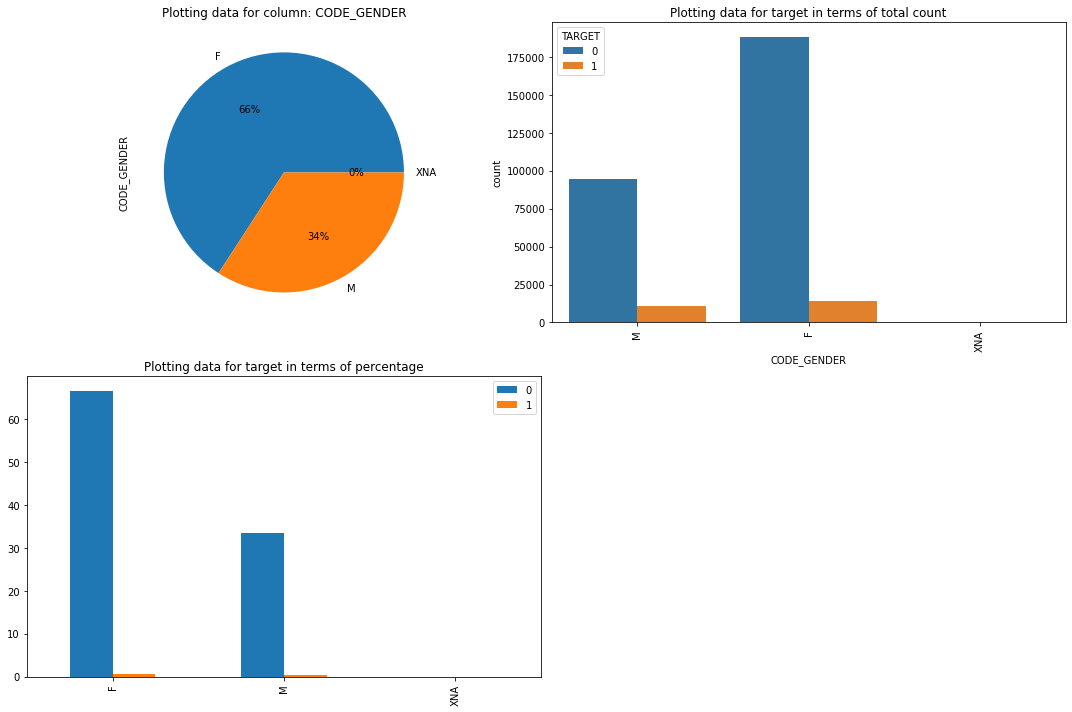




Plotting  NAME_CONTRACT_TYPE


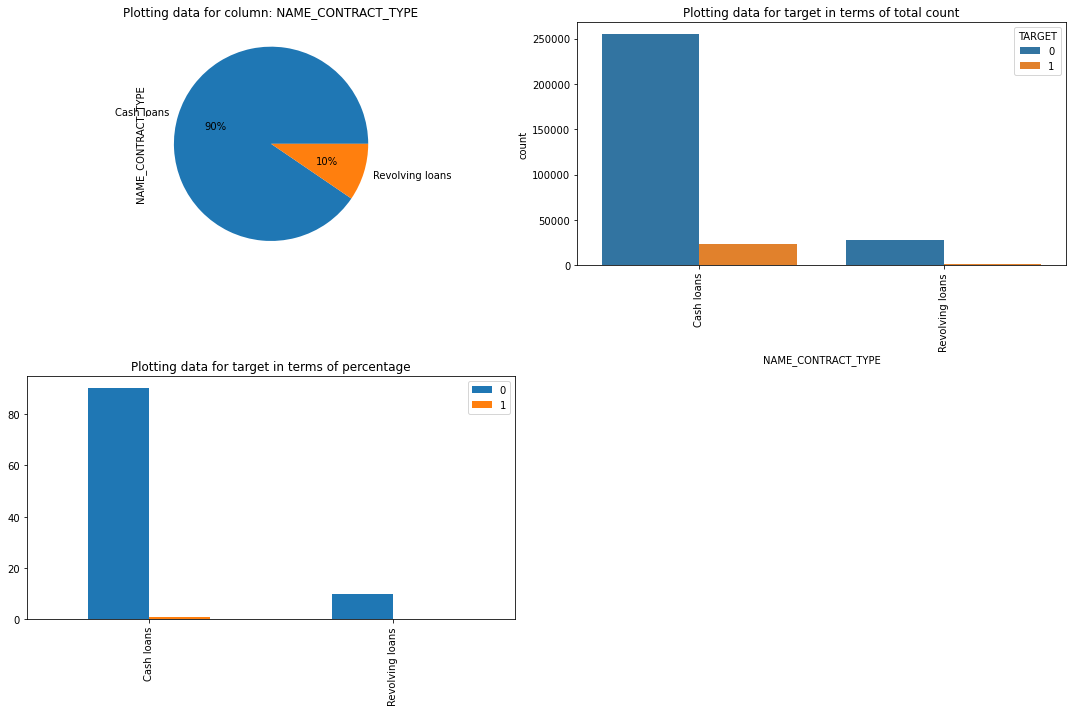




Plotting  FLAG_OWN_REALTY


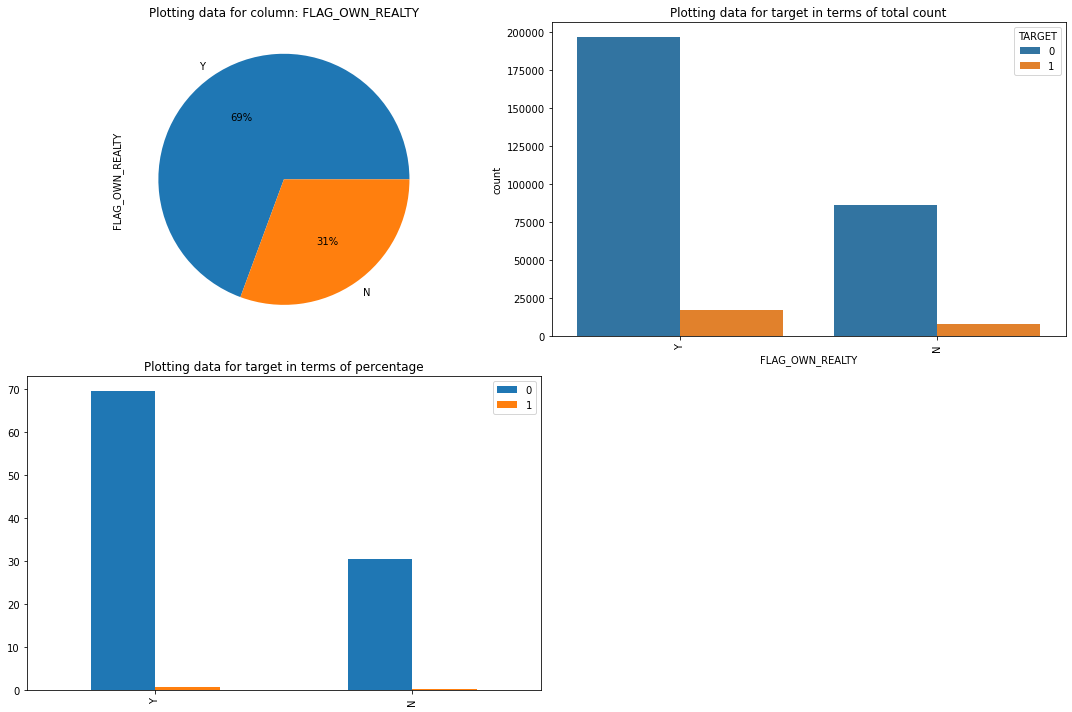




Plotting  FLAG_OWN_CAR


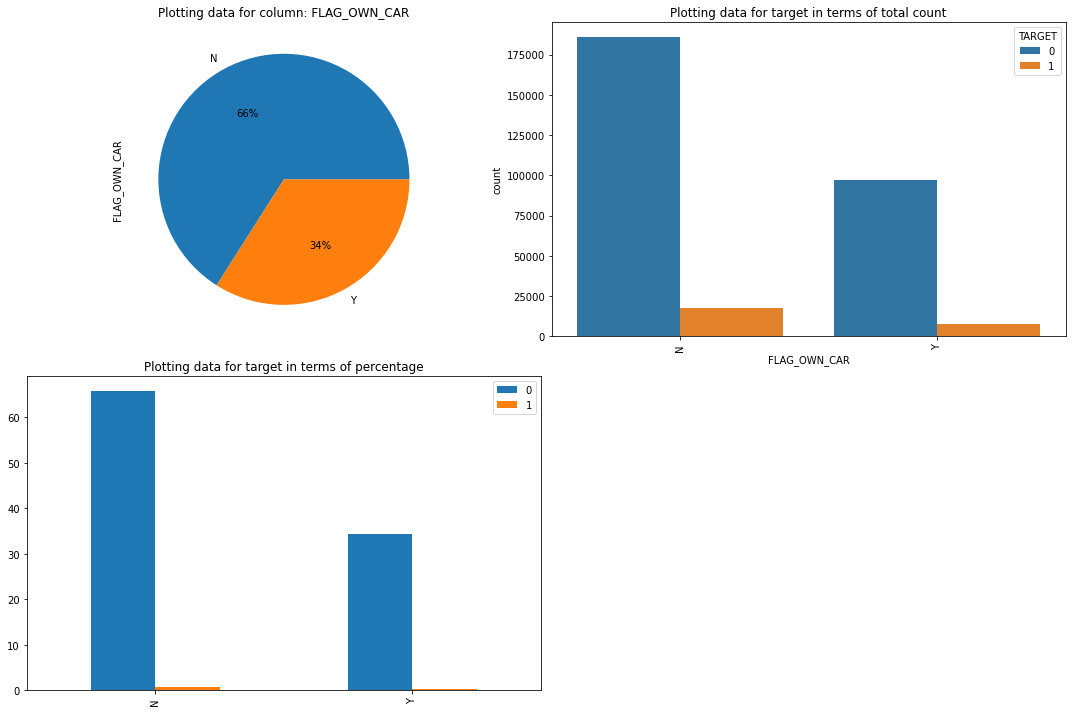




Plotting  NAME_INCOME_TYPE


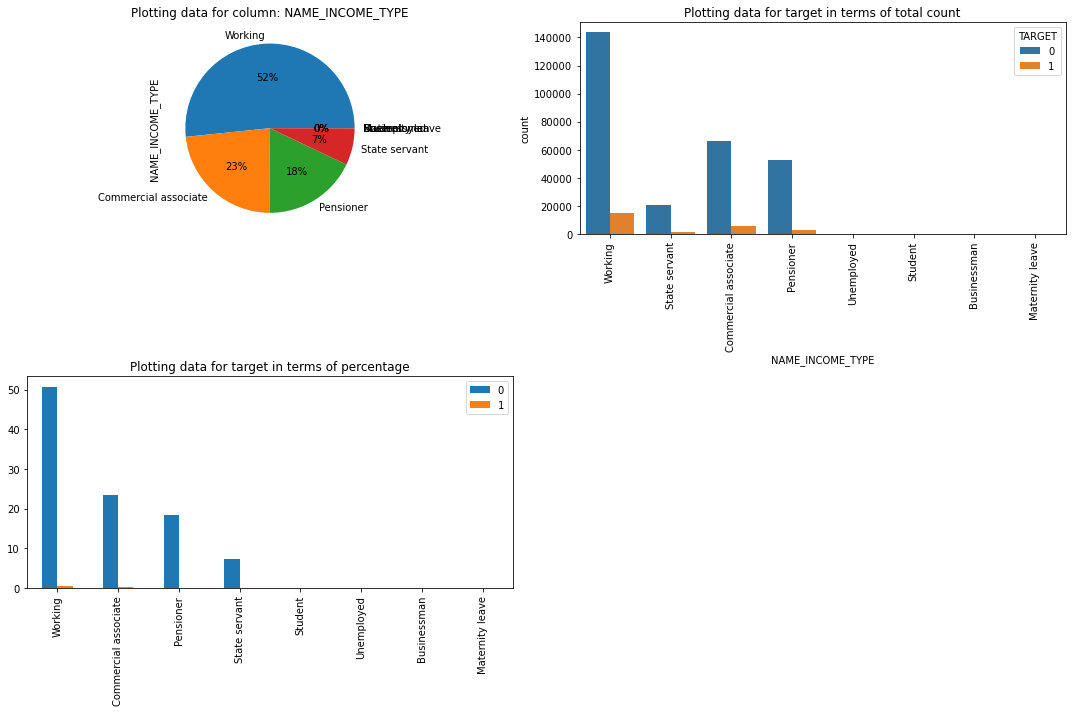




Plotting  NAME_FAMILY_STATUS


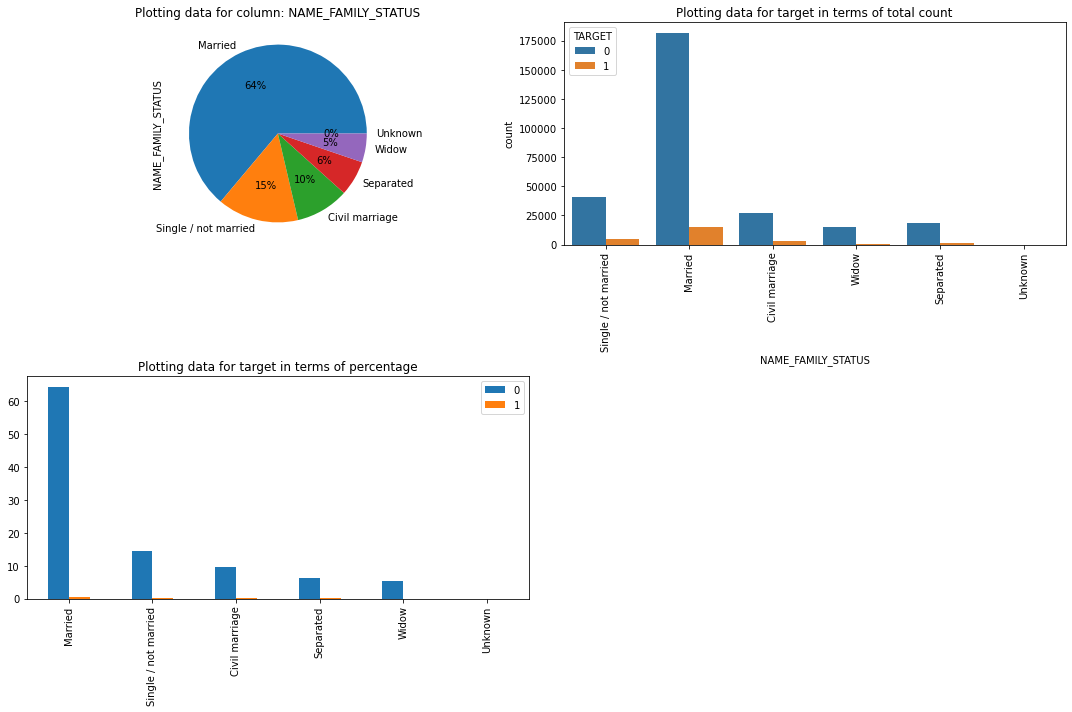




Plotting  NAME_EDUCATION_TYPE


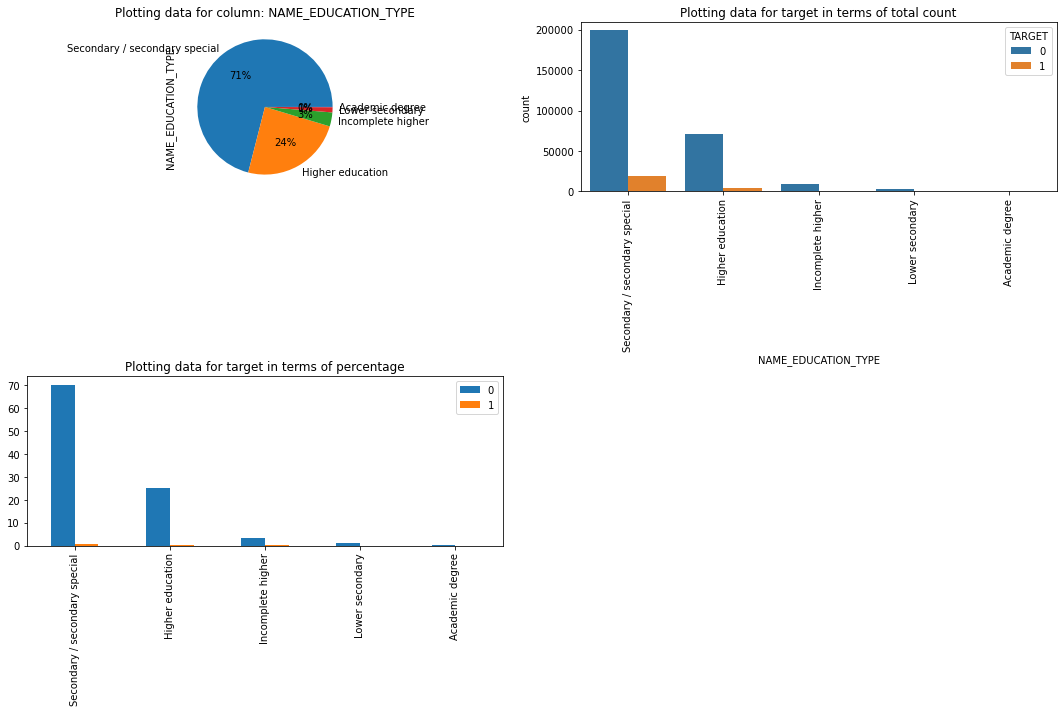




Plotting  WEEKDAY_APPR_PROCESS_START


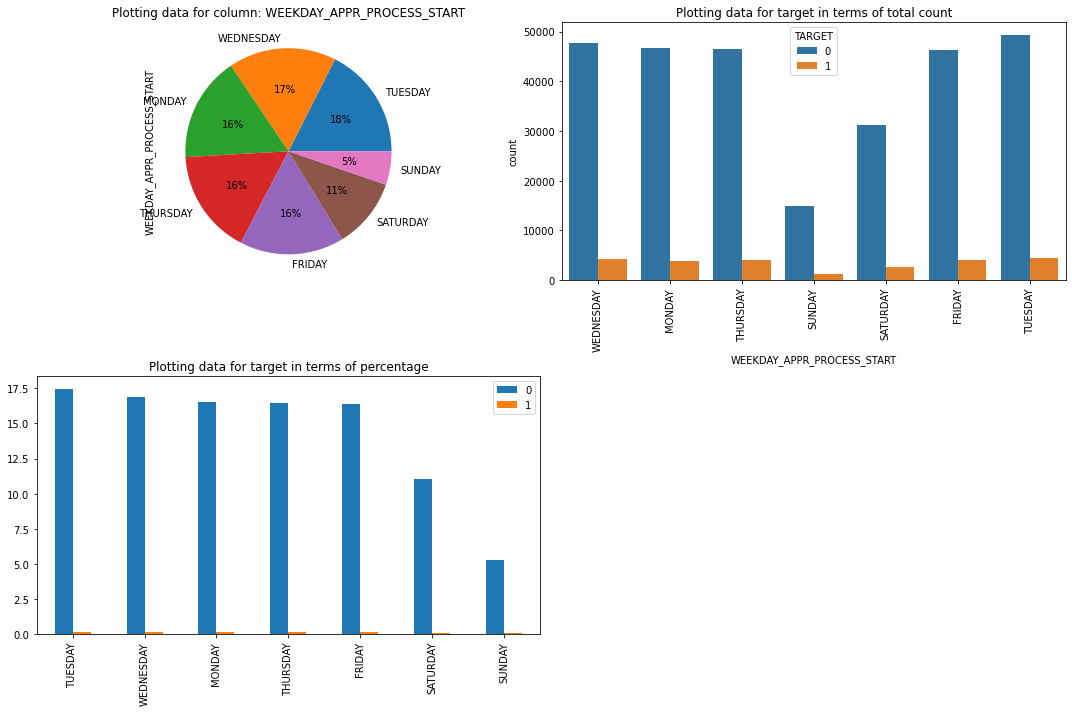




Plotting  NAME_HOUSING_TYPE


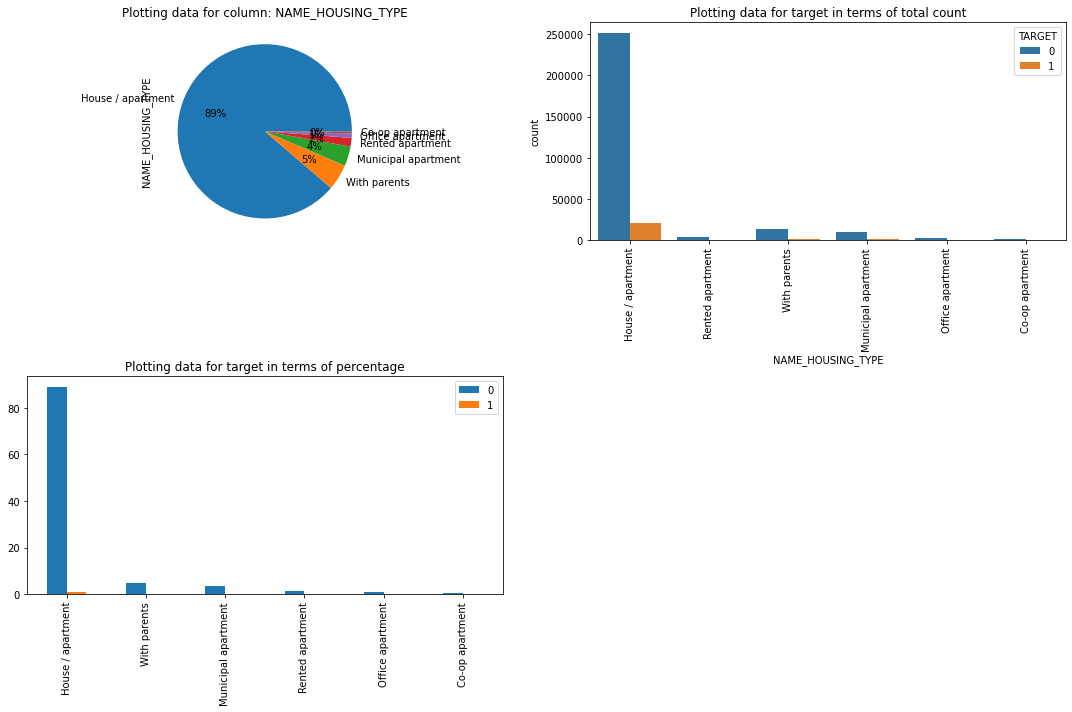




Plotting  ORGANIZATION_TYPE


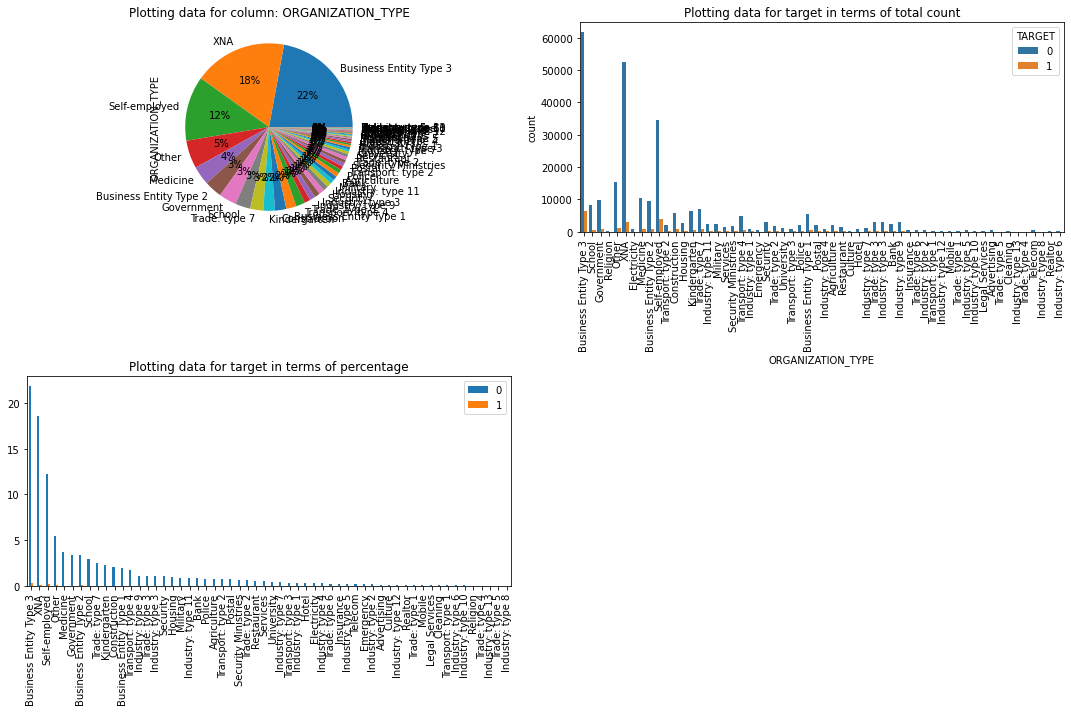




Plotting  NAME_TYPE_SUITE


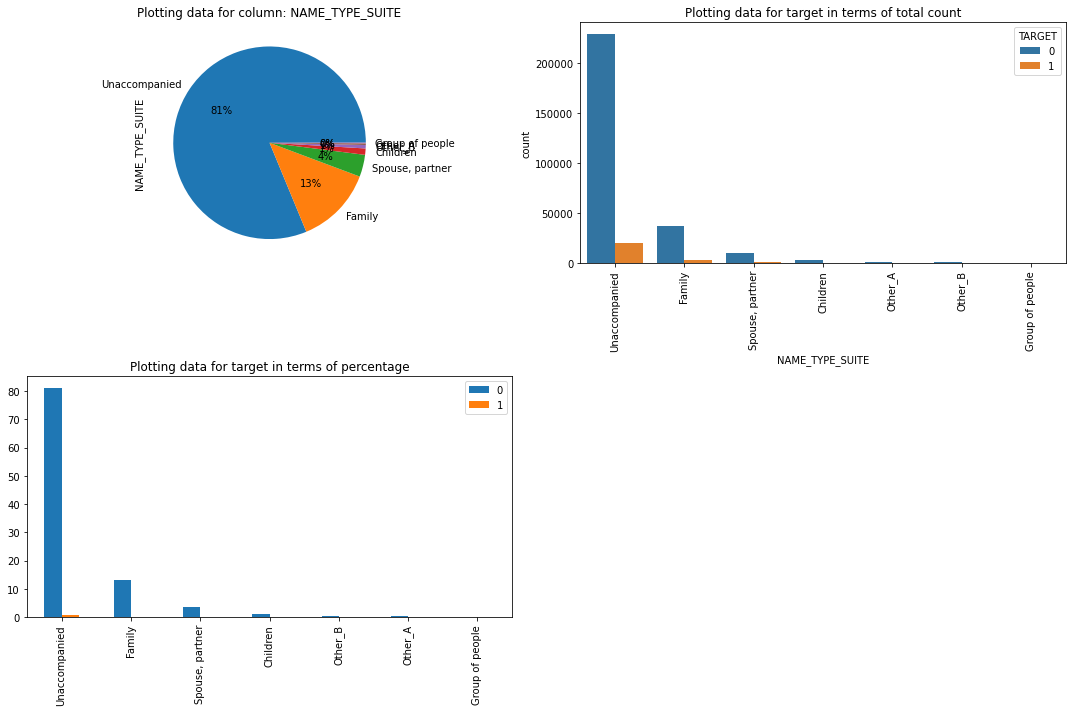




Plotting  OCCUPATION_TYPE


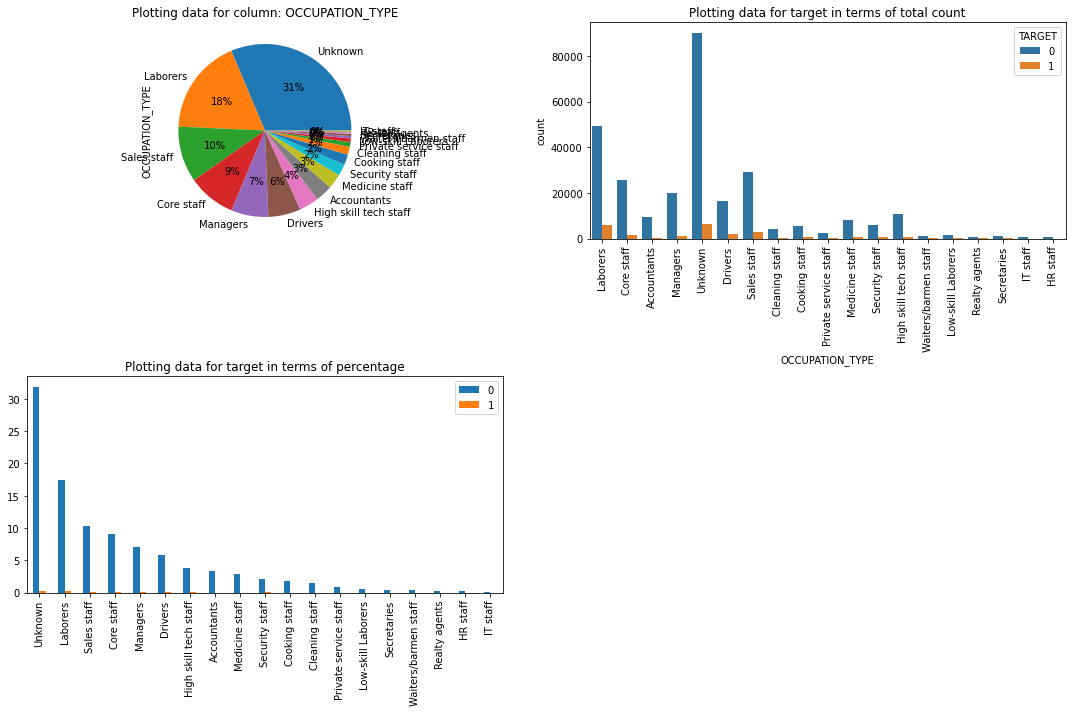

In [73]:
for column in catcol:
    print("Plotting ",column)
    plotting(application_data, train_0, train_1, column)
    print("="*100)
    print('\n\n')

#### OBSERVATIONS:
1) People who's highest education level is Secondary education have applied more loans

2) On Sundays there are fewer applications for applying loans may be as it is a weekend most of people may spend their time with their families or friends

3) Females have applied more loans than Males.

4) People who are married applied loans, may be to satisfy needs their family.

5) Cash loans are more than Revolving loans

6) Keeping aside of "Unknown" occupation type Laborers have applied more loans, this could be because of less income.

7) Owning a car might be an indicator of ability to payoff loans almost 35% of car owners fall in Target = 0

8) It is also obseved that loan could be for a car as 66% clients don't own cars

9) Owning realty also indicates loan payoff ability as 69% own realty and 68% of falls in Target = 0 

10) Loan applicants tend to prefer coming in unaccompanied (81%)

#### Univariate Analysis of Numerical Columns Application data set

In [74]:
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG

In [75]:
def plotting_numerical(train,column):
    
    train = train
    col = column
    
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(121)
    sns.histplot(train[col])
    plt.title('Plotting data for the column: '+ column)
    
    ax3 = plt.subplot(122)
    df = pd.DataFrame()
    df[' Client with payment difficulties']= ((train_0[col].value_counts())/len(train_0))
    df['All other cases']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    plt.show()

In [76]:
numerical_col_valuecounts10 = []
for i in num_col:
    if len(application_data[i].value_counts()) < 10:
        numerical_col_valuecounts10.append(i)
len(numerical_col_valuecounts10)

39

Plotting  TARGET


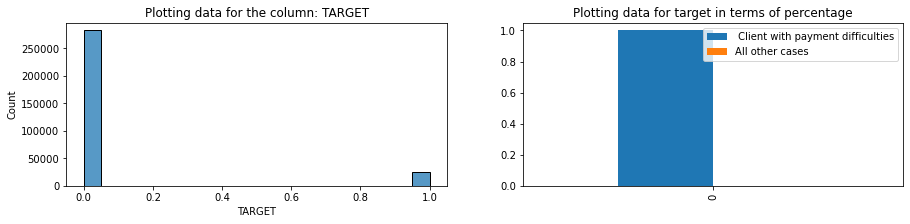




Plotting  FLAG_MOBIL


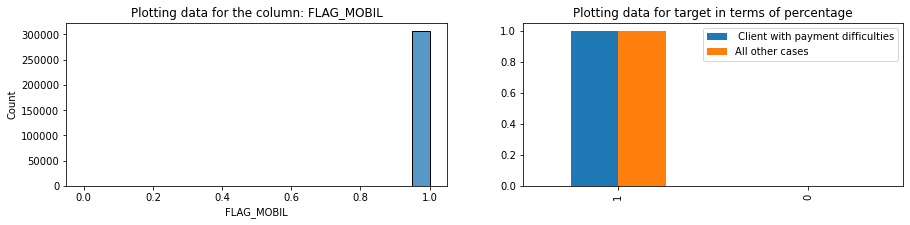




Plotting  FLAG_EMP_PHONE


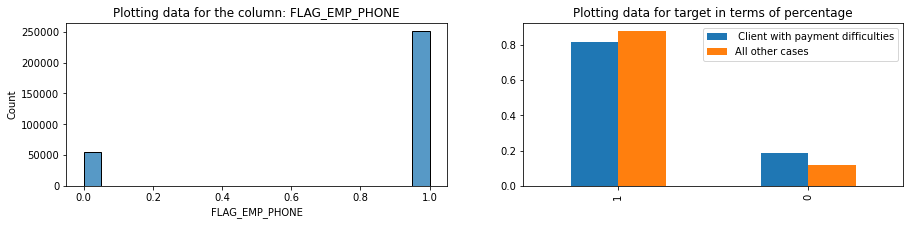




Plotting  FLAG_WORK_PHONE


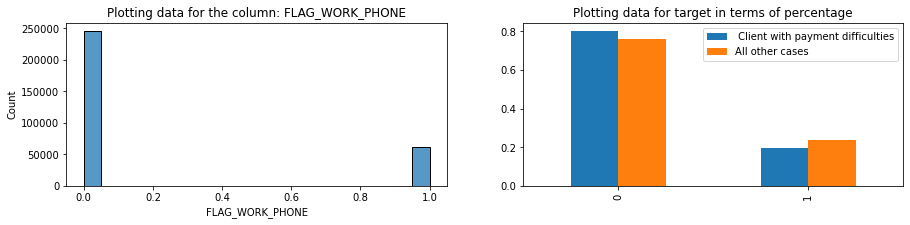




Plotting  FLAG_CONT_MOBILE


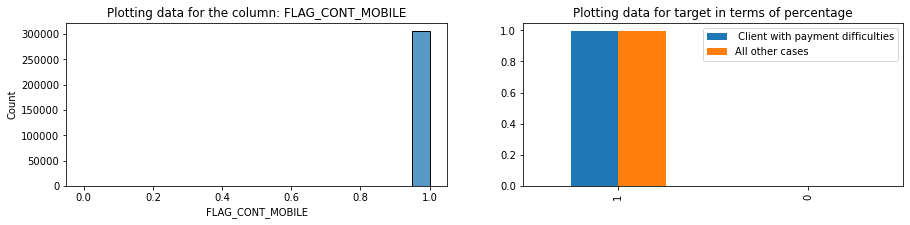




Plotting  FLAG_PHONE


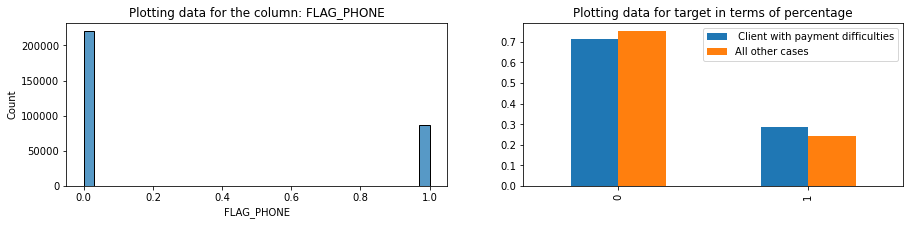




Plotting  FLAG_EMAIL


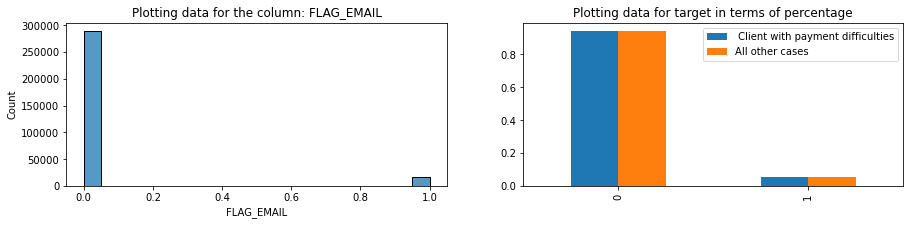




Plotting  REGION_RATING_CLIENT


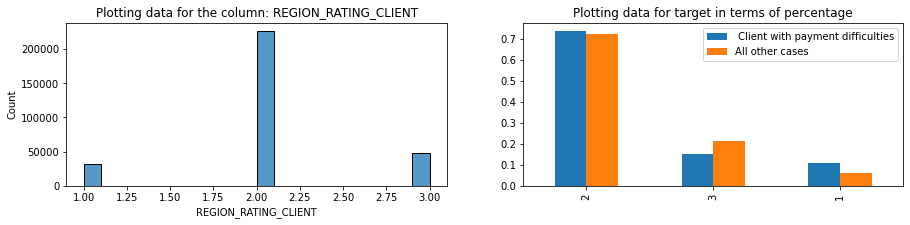




Plotting  REGION_RATING_CLIENT_W_CITY


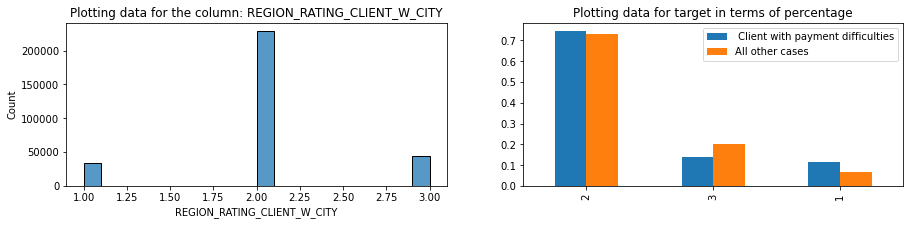




Plotting  REG_REGION_NOT_LIVE_REGION


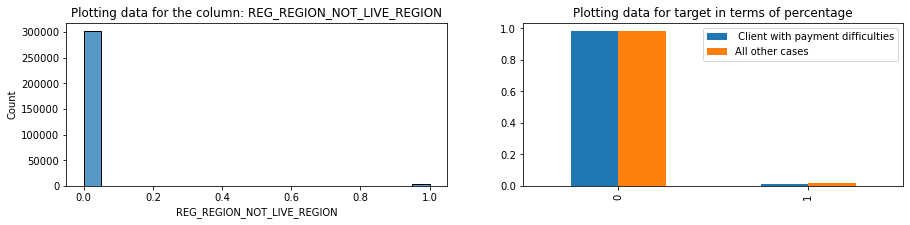




Plotting  REG_REGION_NOT_WORK_REGION


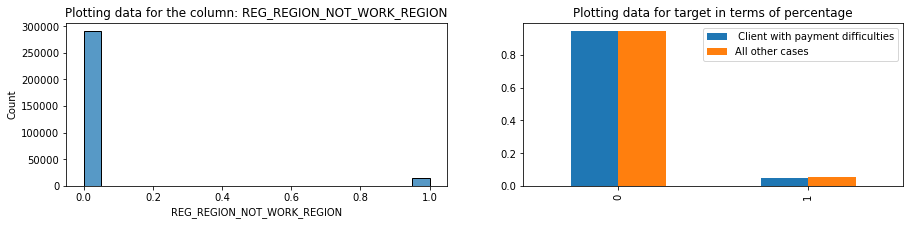




Plotting  LIVE_REGION_NOT_WORK_REGION


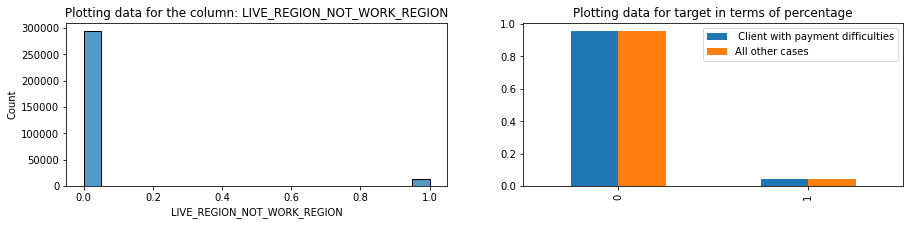




Plotting  REG_CITY_NOT_LIVE_CITY


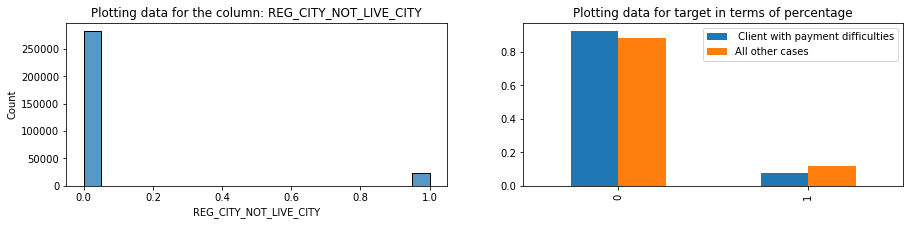




Plotting  REG_CITY_NOT_WORK_CITY


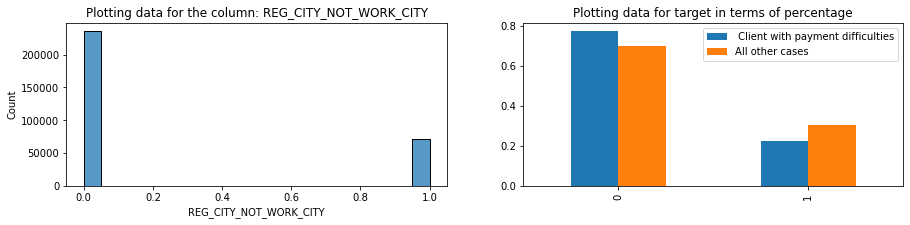




Plotting  LIVE_CITY_NOT_WORK_CITY


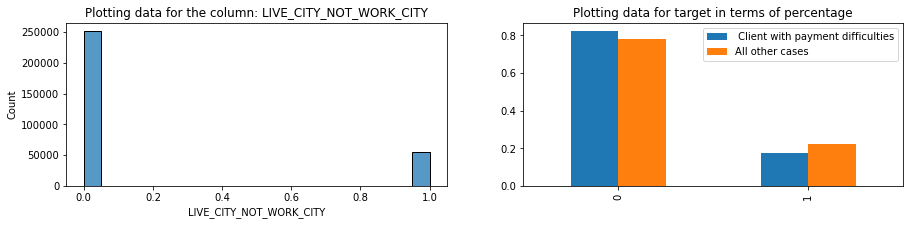




Plotting  DEF_60_CNT_SOCIAL_CIRCLE


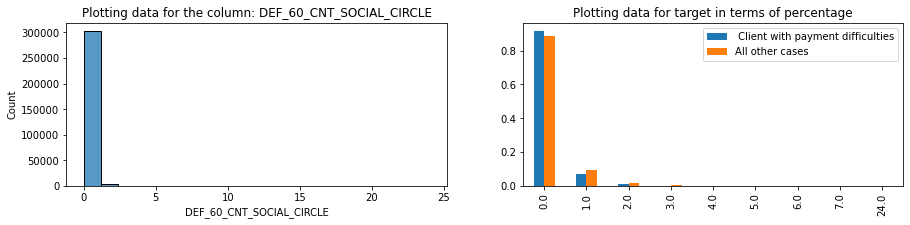




Plotting  FLAG_DOCUMENT_2


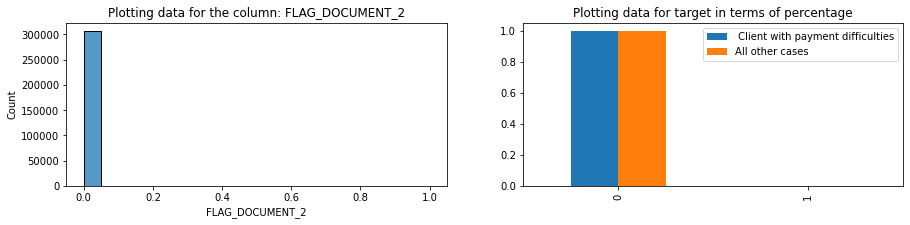




Plotting  FLAG_DOCUMENT_3


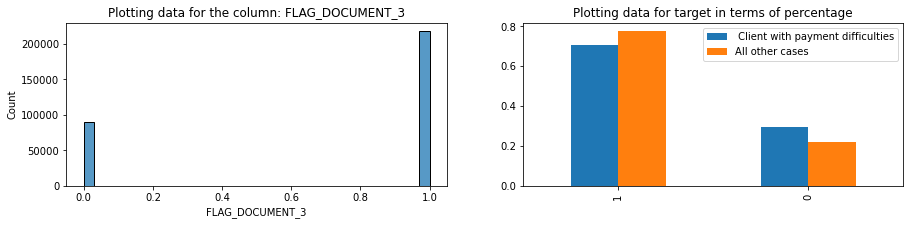




Plotting  FLAG_DOCUMENT_4


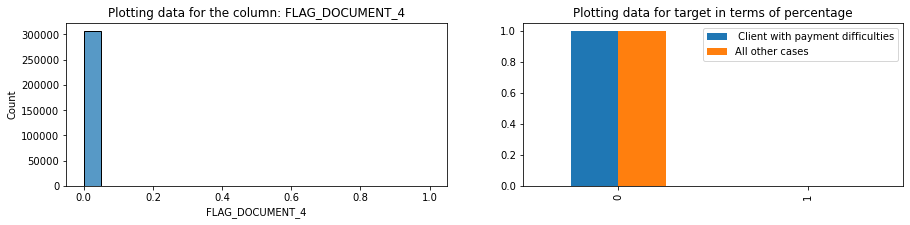




Plotting  FLAG_DOCUMENT_5


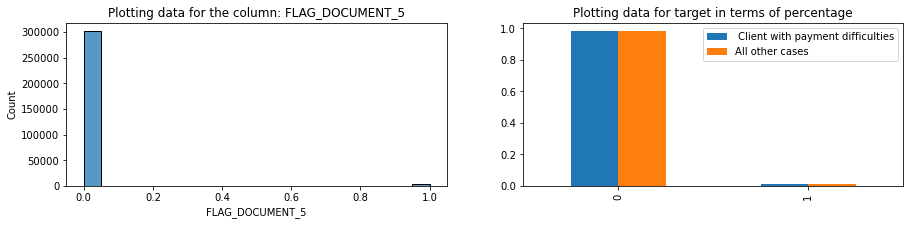




Plotting  FLAG_DOCUMENT_6


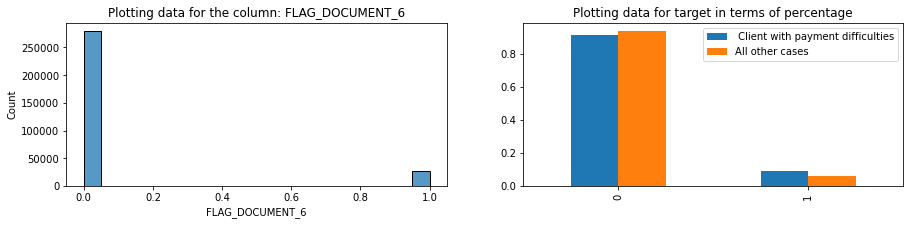




Plotting  FLAG_DOCUMENT_7


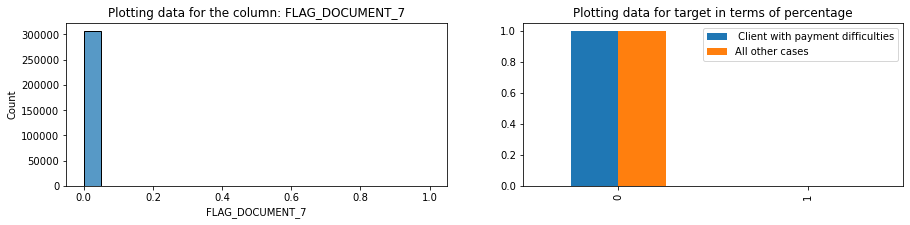




Plotting  FLAG_DOCUMENT_8


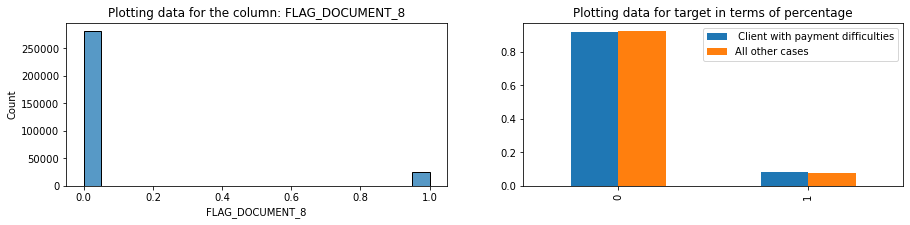




Plotting  FLAG_DOCUMENT_9


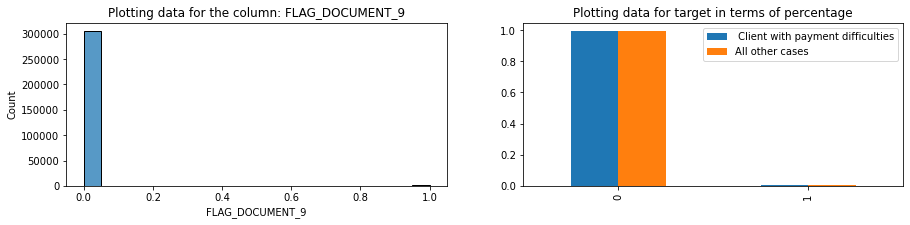




Plotting  FLAG_DOCUMENT_10


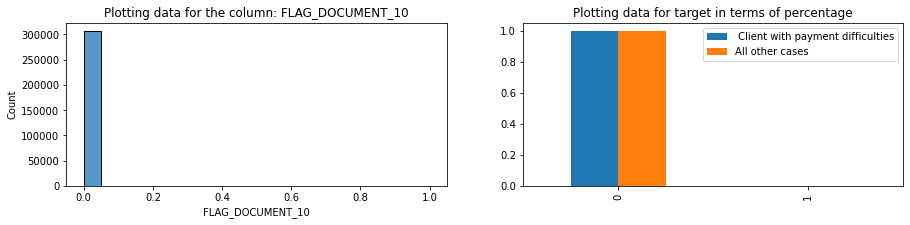




Plotting  FLAG_DOCUMENT_11


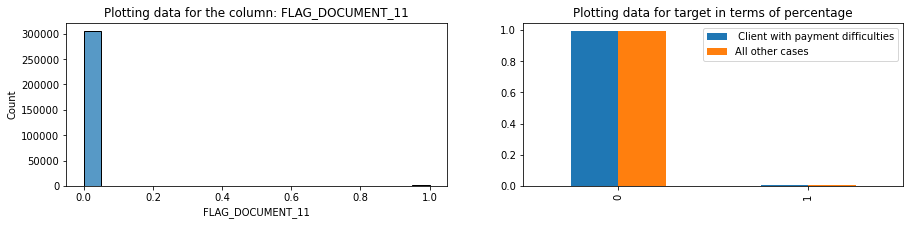




Plotting  FLAG_DOCUMENT_12


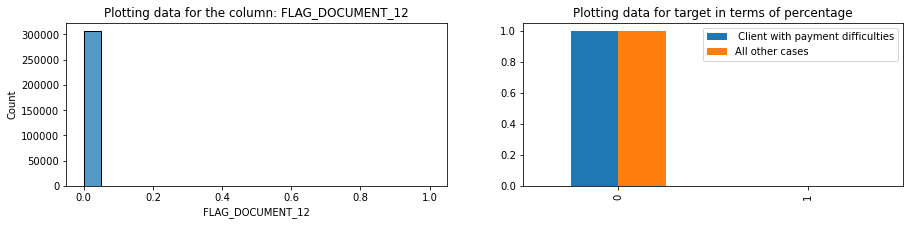




Plotting  FLAG_DOCUMENT_13


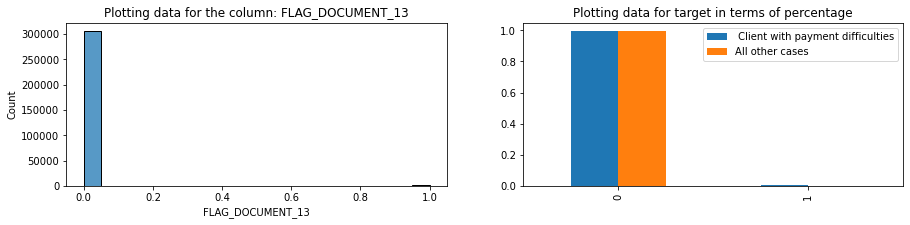




Plotting  FLAG_DOCUMENT_14


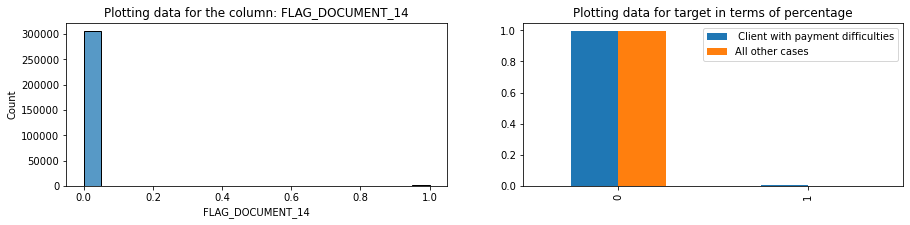




Plotting  FLAG_DOCUMENT_15


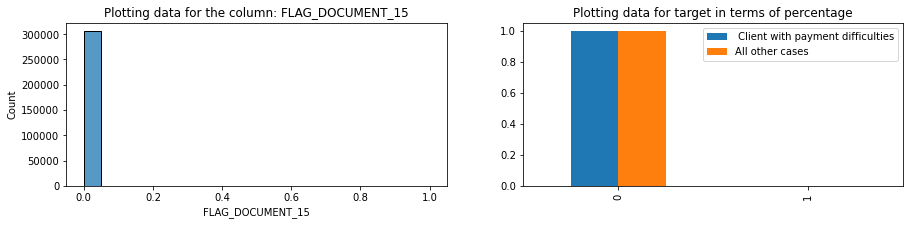




Plotting  FLAG_DOCUMENT_16


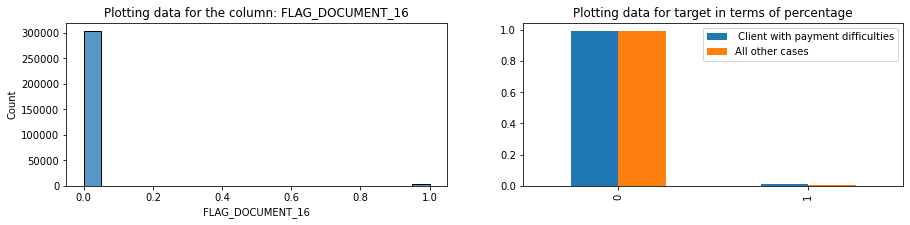




Plotting  FLAG_DOCUMENT_17


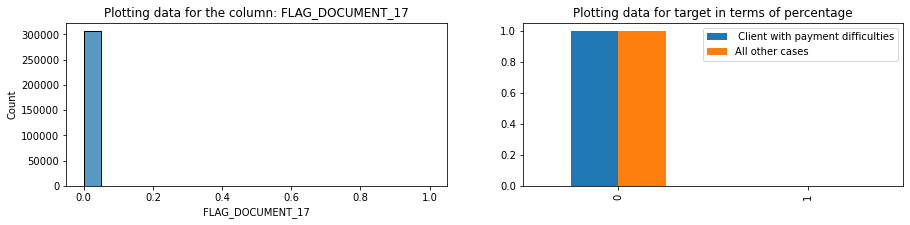




Plotting  FLAG_DOCUMENT_18


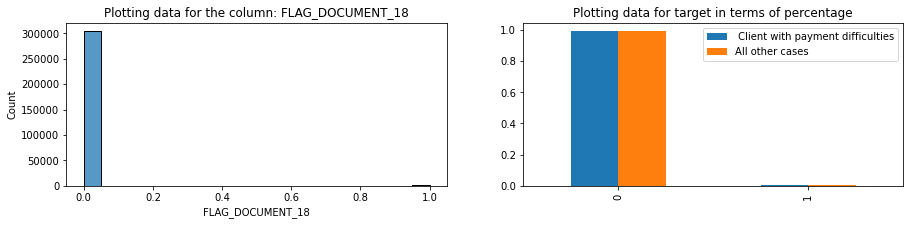




Plotting  FLAG_DOCUMENT_19


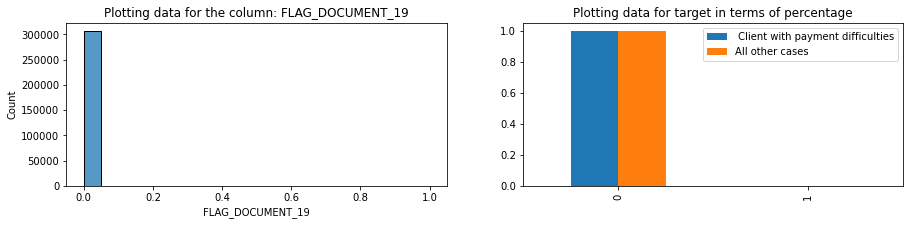




Plotting  FLAG_DOCUMENT_20


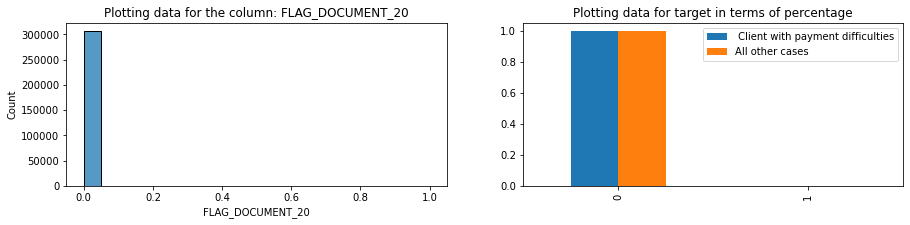




Plotting  FLAG_DOCUMENT_21


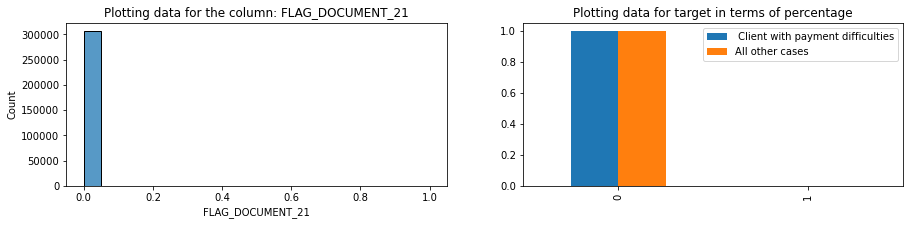




Plotting  AMT_REQ_CREDIT_BUREAU_HOUR


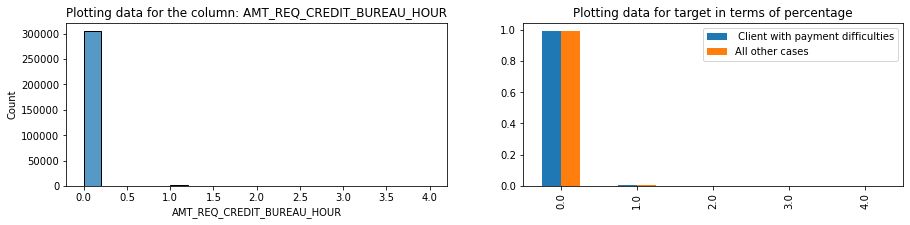




Plotting  AMT_REQ_CREDIT_BUREAU_DAY


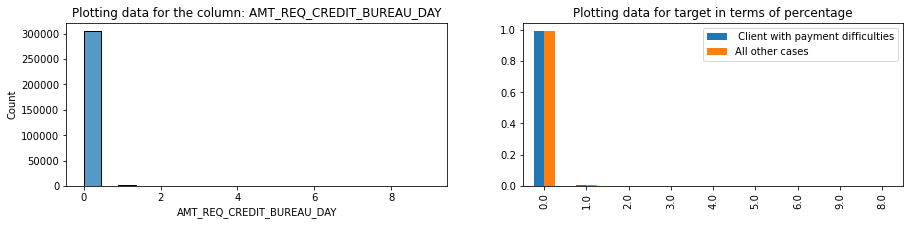




Plotting  AMT_REQ_CREDIT_BUREAU_WEEK


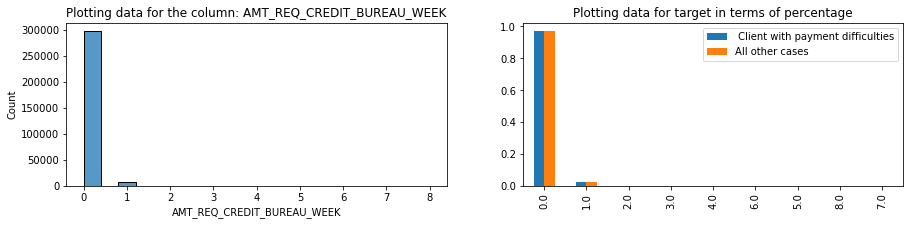

In [77]:
for column in numerical_col_valuecounts10:
    print("Plotting ",column)
    plotting_numerical(application_data,column)
    print("="*100)
    print('\n\n')

#### Observations:

Columns:
- REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)	
- REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)	
1. Region 2 has the most applications 
2. Region 3 has more defaulters 
3. Region 1 has more repayers 


#### Finding Top 10 correlations for train_0 and train_1

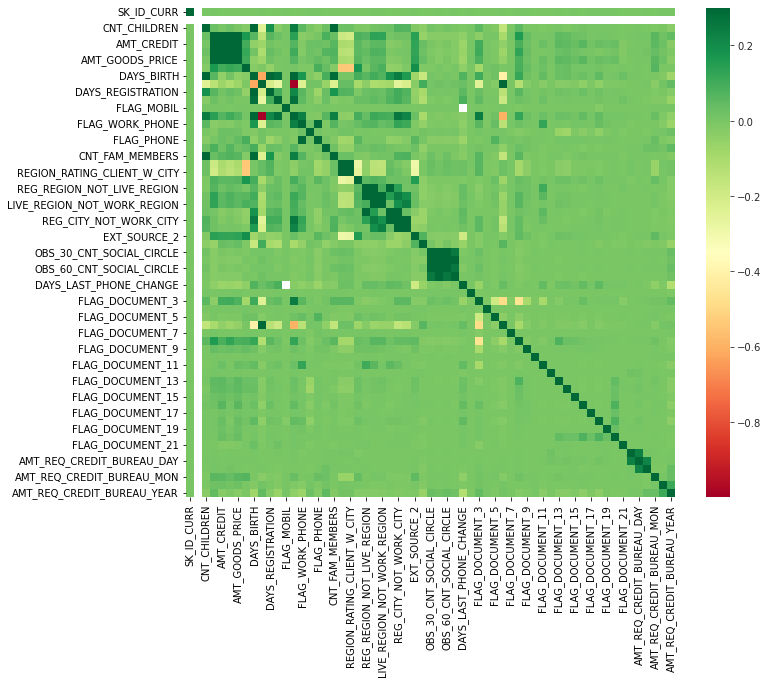

In [78]:
import numpy as np
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=.3, square=True, cmap = 'RdYlGn');

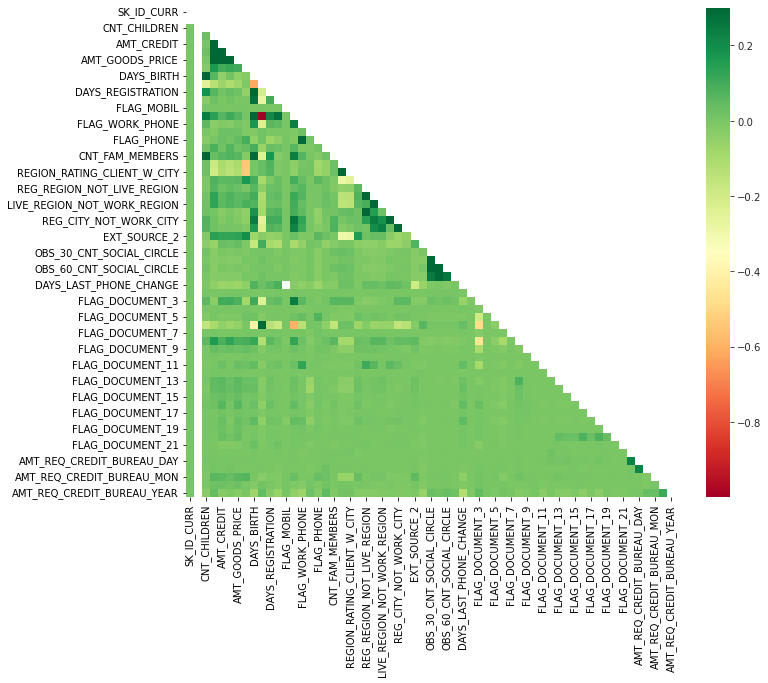

In [79]:
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap = 'RdYlGn');

In [80]:
train_0.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR                     1.000000     NaN     -0.000716          0.001739   -0.000342     0.000071        -0.000235                    0.000360   -0.001346       0.001744          -0.001475        -0.000077    0.002925       -0.001717        -0.000854          0.003319    0.001408    0.000229        -0.002789             -0.000519                    -0.000739                -0.000115                    0.000104                    0.000836                     0.002784               -0.002885               -0.001696                 0.000428      0.001570      0.000300                 -0.000697                  0.000553                 -0.000743                  0.002375               -0.000998         0.001342        -0.003217        -0.004321        -0.001426         0.001972        -0.003047         0.001618         0.002007         -0.000852         -0.001900         -0.001092          0.001006         -0.001236      2.330251e-03         -0.000753          0.001776          0.001194          0.000676          0.000832         -0.000485               -1.773820e-03                  -0.001626                    0.002298                  -0.000037                   0.000963                    0.003517
TARGET                              NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
CNT_CHILDREN                  -0.000716     NaN      1.000000          0.027397    0.003081     0.020909        -0.000559                   -0.024363    0.336966      -0.243356           0.185792        -0.028751    0.001080        0.244274         0.055453         -0.001201   -0.029929    0.023460         0.878571              0.022842                   

In [81]:
train_0.corr().shape

(61, 61)

In [82]:
train_0.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR                     1.000000     NaN      0.000716          0.001739    0.000342     0.000071         0.000235                    0.000360    0.001346       0.001744           0.001475         0.000077    0.002925        0.001717         0.000854          0.003319    0.001408    0.000229         0.002789              0.000519                     0.000739                 0.000115                    0.000104                    0.000836                     0.002784                0.002885                0.001696                 0.000428      0.001570      0.000300                  0.000697                  0.000553                  0.000743                  0.002375                0.000998         0.001342         0.003217         0.004321         0.001426         0.001972         0.003047         0.001618         0.002007          0.000852          0.001900          0.001092          0.001006          0.001236      2.330251e-03          0.000753          0.001776          0.001194          0.000676          0.000832          0.000485                1.773820e-03                   0.001626                    0.002298                   0.000037                   0.000963                    0.003517
TARGET                              NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
CNT_CHILDREN                   0.000716     NaN      1.000000          0.027397    0.003081     0.020909         0.000559                    0.024363    0.336966       0.243356           0.185792         0.028751    0.001080        0.244274         0.055453          0.001201    0.029929    0.023460         0.878571              0.022842                   

In [83]:
train_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000716
                            AMT_INCOME_TOTAL              0.001739
                            AMT_CREDIT                    0.000342
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.004233
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.038840
                            AMT_REQ_CREDIT_BUREAU_MON     0.031754
                            AMT_REQ_CREDIT_BUREAU_QRT     0.110657
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 3721, dtype: float64

In [84]:
train_0.corr().abs().unstack().sort_values(kind='quicksort')

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
EXT_SOURCE_2                FLAG_DOCUMENT_2               1.205984e-06
FLAG_DOCUMENT_2             EXT_SOURCE_2                  1.205984e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
Length: 3721, dtype: float64

In [85]:
train_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
EXT_SOURCE_2                FLAG_DOCUMENT_2               1.205984e-06
FLAG_DOCUMENT_2             EXT_SOURCE_2                  1.205984e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
DAYS_LAST_PHONE_CHANGE      DAYS_LAST_PHONE_CHANGE        1.000000e+00
DEF_60_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000e+00
FLAG_DOCUMENT_11            FLAG_DOCUMENT_11              1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 3598, dtype: float64

In [86]:
correlation_0 = train_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
EXT_SOURCE_2                FLAG_DOCUMENT_2               1.205984e-06
FLAG_DOCUMENT_2             EXT_SOURCE_2                  1.205984e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
DAYS_LAST_PHONE_CHANGE      DAYS_LAST_PHONE_CHANGE        1.000000e+00
DEF_60_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000e+00
FLAG_DOCUMENT_11            FLAG_DOCUMENT_11              1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 3598, dtype: float64

In [87]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_15              2.064400e-07
FLAG_DOCUMENT_15            AMT_REQ_CREDIT_BUREAU_HOUR    2.064400e-07
EXT_SOURCE_2                FLAG_DOCUMENT_2               1.205984e-06
FLAG_DOCUMENT_2             EXT_SOURCE_2                  1.205984e-06
FLAG_MOBIL                  FLAG_DOCUMENT_12              5.002798e-06
                                                              ...     
AMT_GOODS_PRICE             AMT_CREDIT                    9.870215e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.985103e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.985103e-01
DAYS_EMPLOYED               FLAG_EMP_PHONE                9.997584e-01
FLAG_EMP_PHONE              DAYS_EMPLOYED                 9.997584e-01
Length: 3538, dtype: float64

In [88]:
correlation_0.tail(10)

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998510
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998510
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999758
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999758
dtype: float64

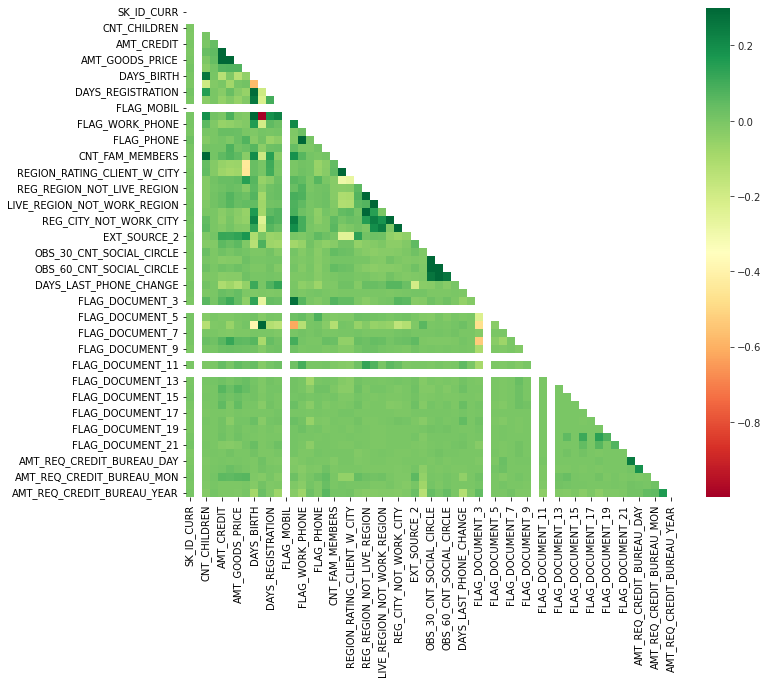

In [89]:
corr = train_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap = 'RdYlGn');

In [90]:
correlation_1 = train_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(10))

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998270
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999702
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
dtype: float64


##### Bivariate Analysis on  train_0 data set (with out payment difficulties)

In [91]:
def plotting_categorical(data, column,hue=None):
        
    fig = plt.figure(figsize=(10,10))
    
    sns.countplot(data[column], order=data[column].value_counts().index, hue= hue, data = data)
    plt.xticks(rotation=90)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Distribution of the: '+ column, fontsize = 20)
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [92]:
# taking only required categorical columns for analysis
req_categorical_col = ['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE','NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE' , 'NAME_EDUCATION_TYPE']
req_categorical_col

['OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE']

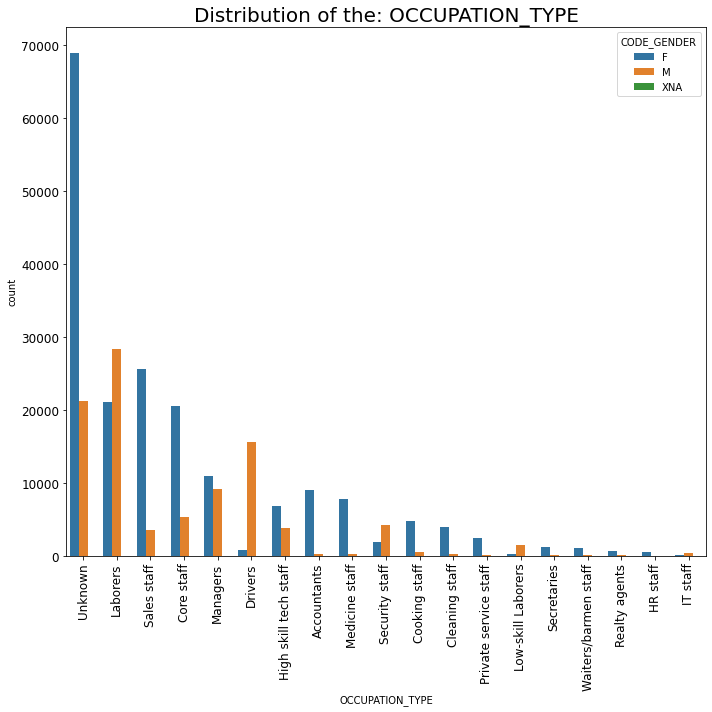

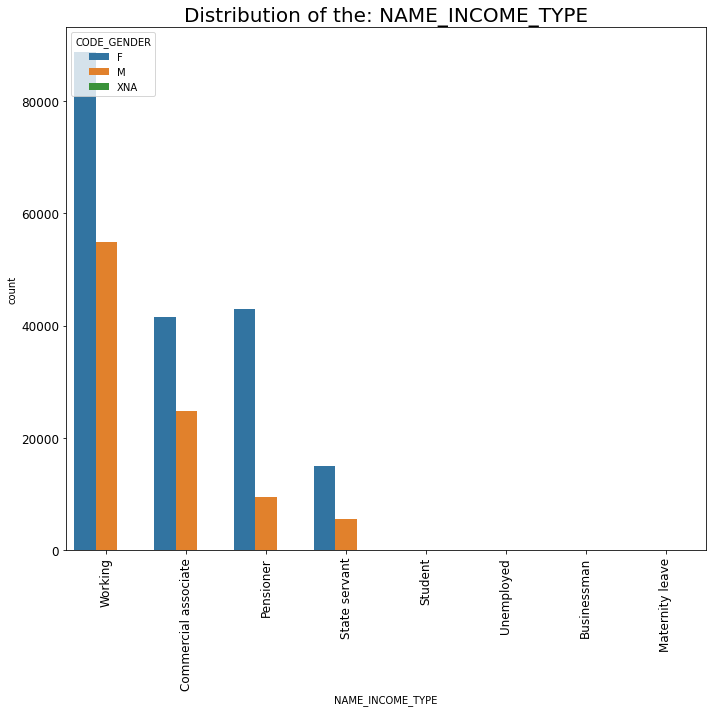

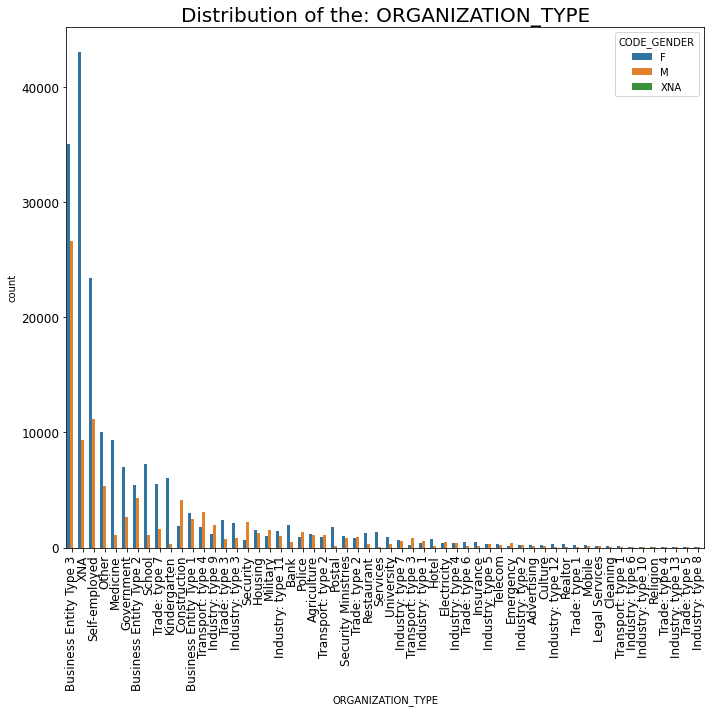

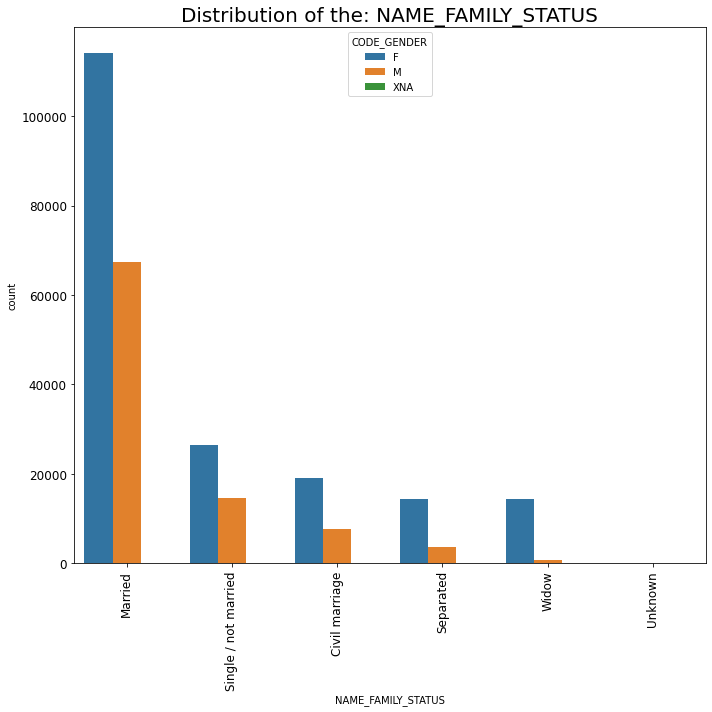

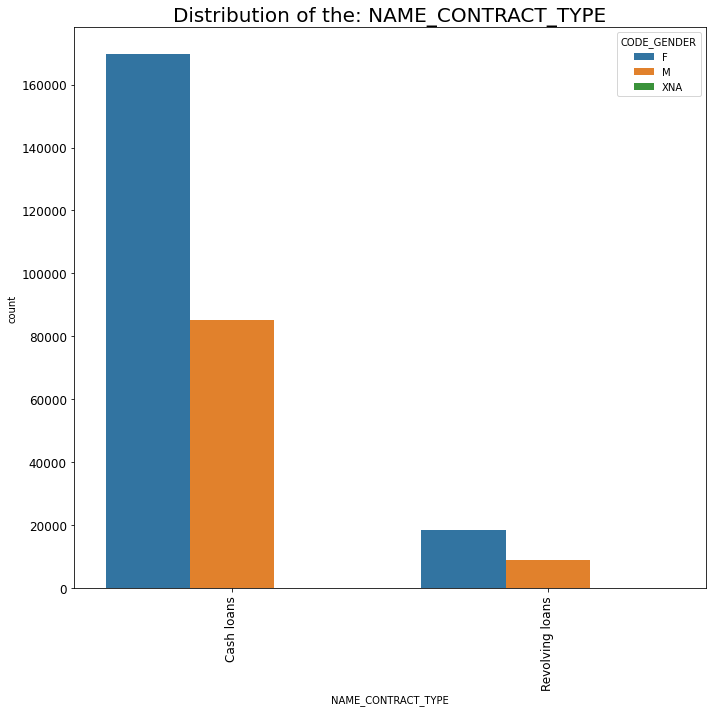

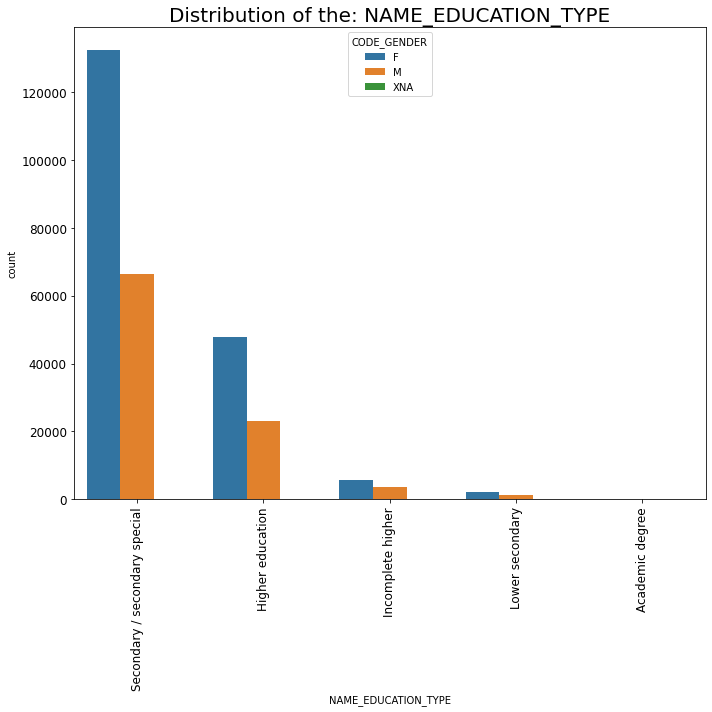

In [93]:
for column in req_categorical_col:
    plotting_categorical(train_0,column,'CODE_GENDER')

- ***Observations***

1) **OCCUPATION_TYPE:** Male Laborers has the maixmum number of applicants and  IT staff has the least

2) **NAME_INCOME_TYPE:** Most Loan Applicants are Working

3) **ORGANIZATION_TYPE:**  
    
    
    a. Loan applicants who applied for loans majorly belong to the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.  
    b. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.


4) **NAME_FAMILY_STATUS:** More married people aply for loans 

5) **NAME_CONTRACT_TYPE:** Females apply for more loans than males and females also apply for more cash loans than revolving loans

6) **NAME_EDUCATION_TYPE:** People with Secondary education apply for the loans the most in both geners. And females in general apply for more loans

##### Bivariate Analysis on  train_1 data set (with payment difficulties)

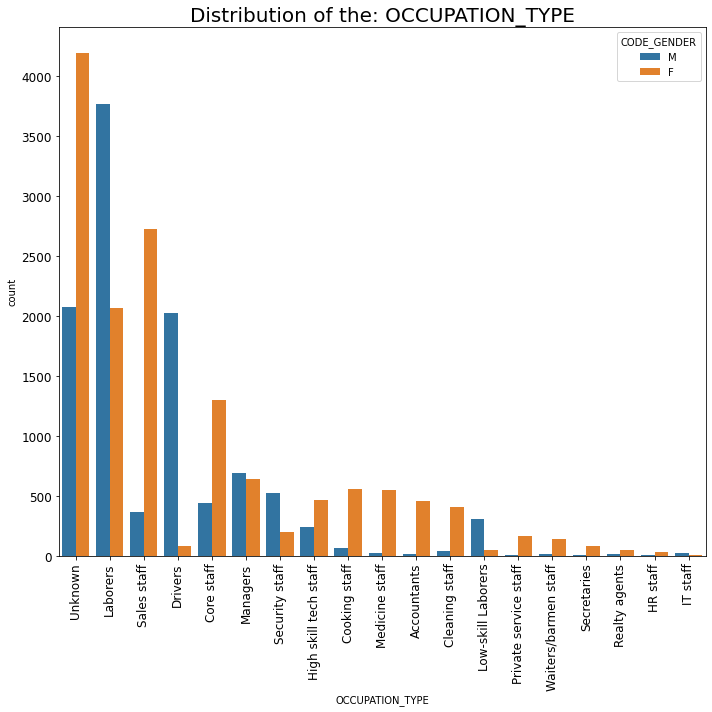

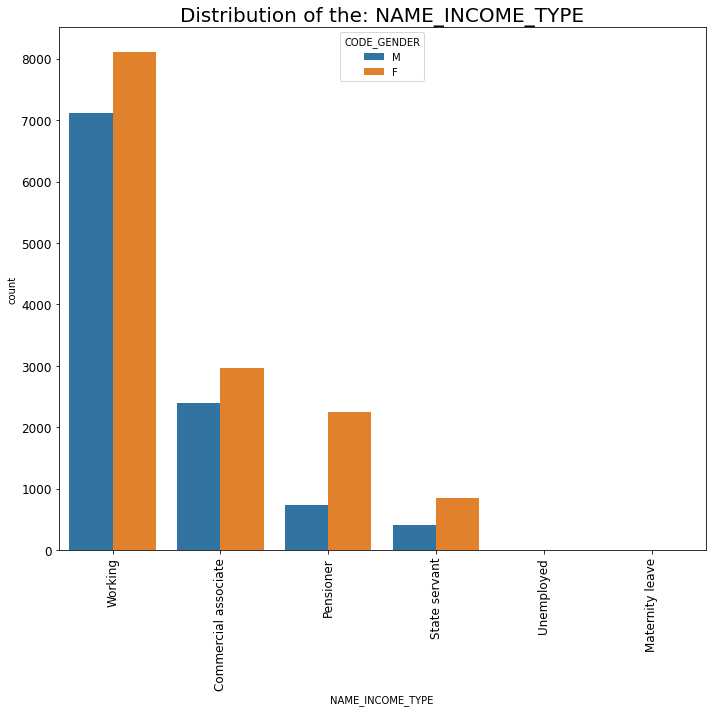

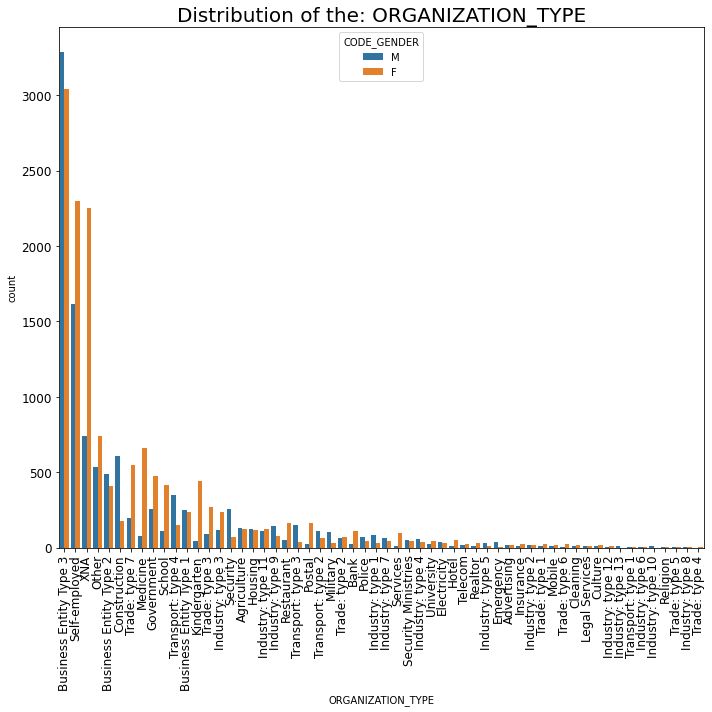

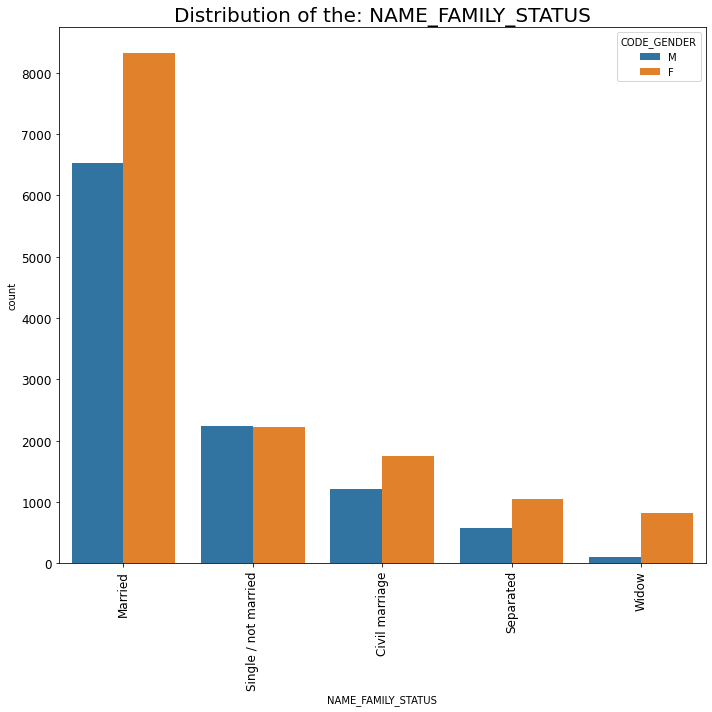

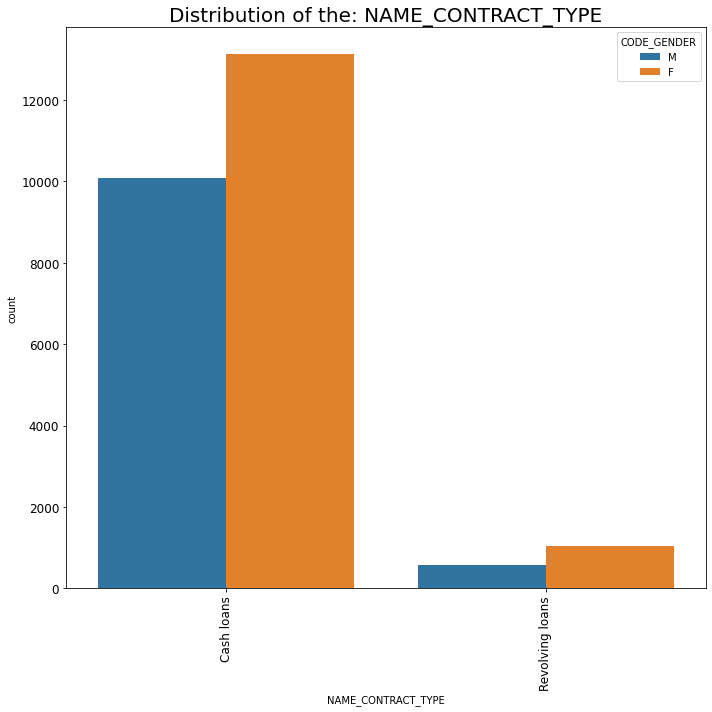

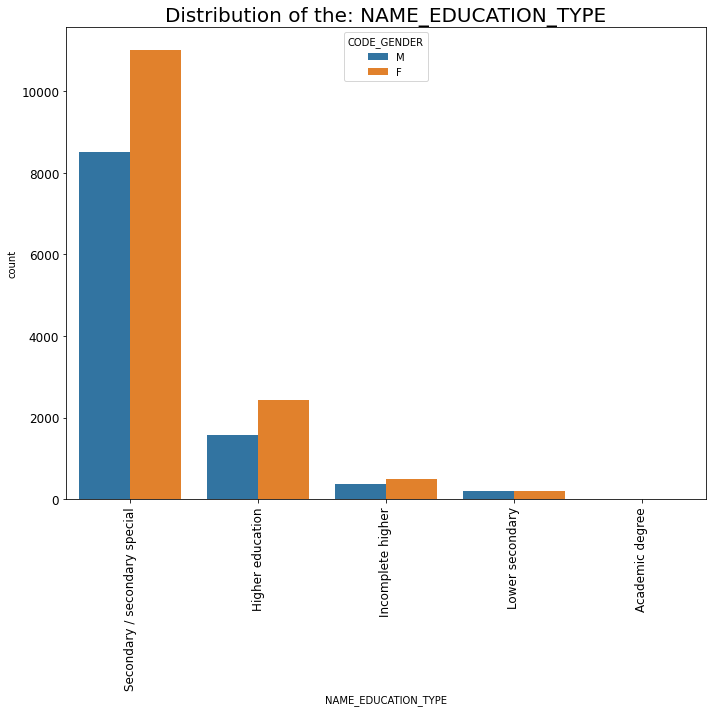

In [94]:
for column in req_categorical_col:
    plotting_categorical(train_1,column,'CODE_GENDER')

- ***Observations***

1) **OCCUPATION_TYPE:** There are more Male Laborers who applied for loan and have difficulty in making payment 

2) **NAME_INCOME_TYPE:**  Pensioner defaulter is lower than non-defautlter

3) **ORGANIZATION_TYPE:**  Payment defaulters are the most in 'Business Entity Type 3', 'Self employed', 'other' categories. 
    

4) **NAME_FAMILY_STATUS:** More married defaulters compared to others

5) **NAME_CONTRACT_TYPE:** Cash loans have more defaulters as expected 

6) **NAME_EDUCATION_TYPE:** Secondary education type has the most defaulters

#### Bivariate Analysis Amt_Income_Total vs the req_categorical_col

In [95]:
def plotting_catVsNum(data, column, column2, hue=None):
        
    fig = plt.figure(figsize=(15,10))
    
    sns.barplot(data[column], data[column2], hue= hue, data = data)
    plt.xticks(rotation=90)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Distribution of the: '+ column + " Vs " + column2 , fontsize = 20)
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

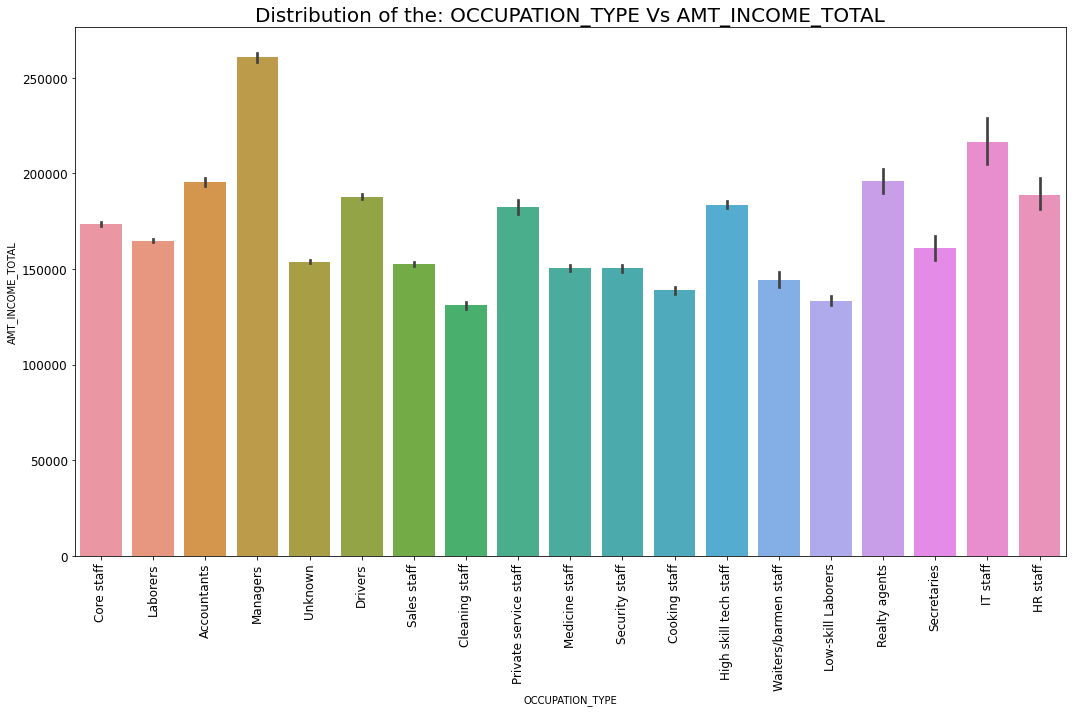

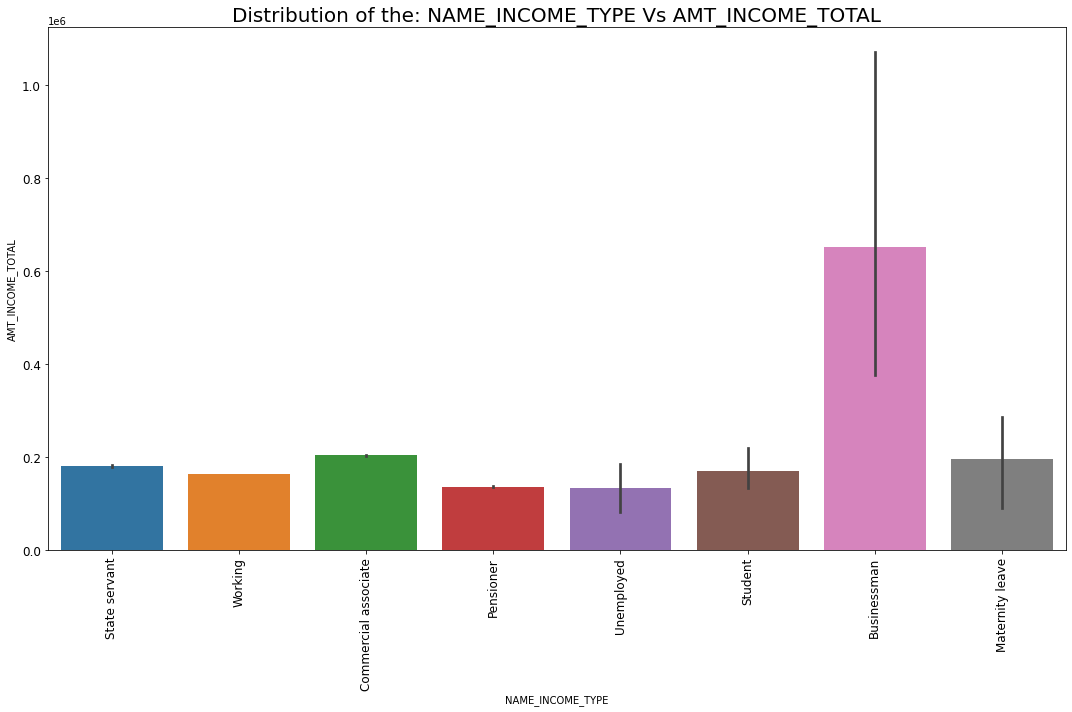

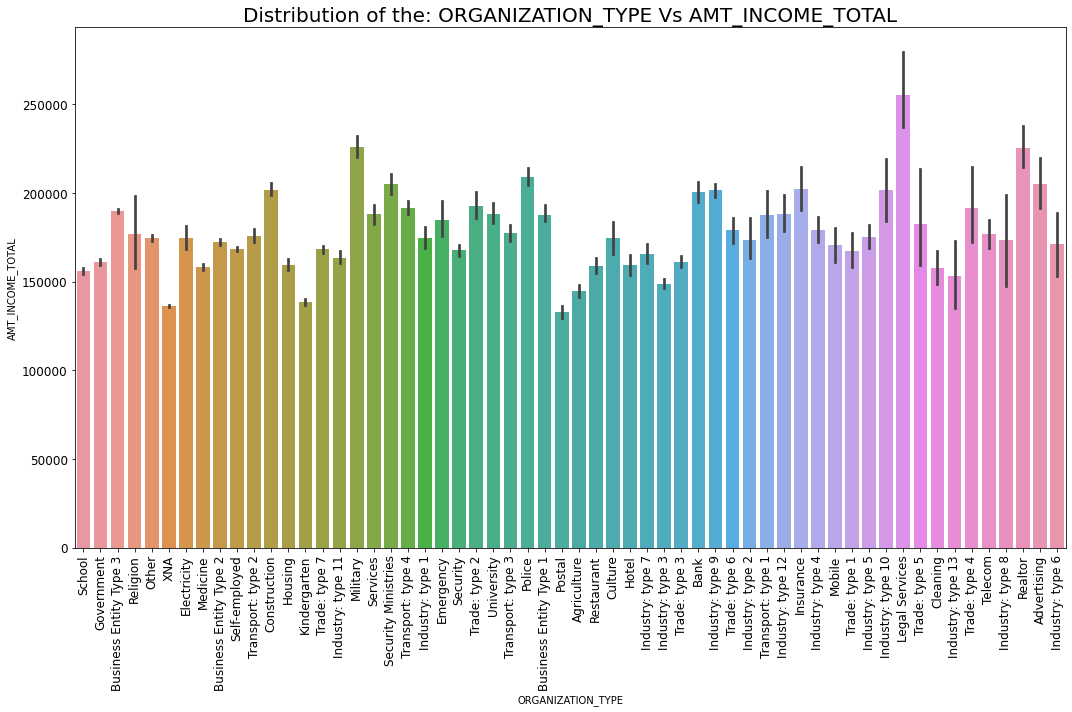

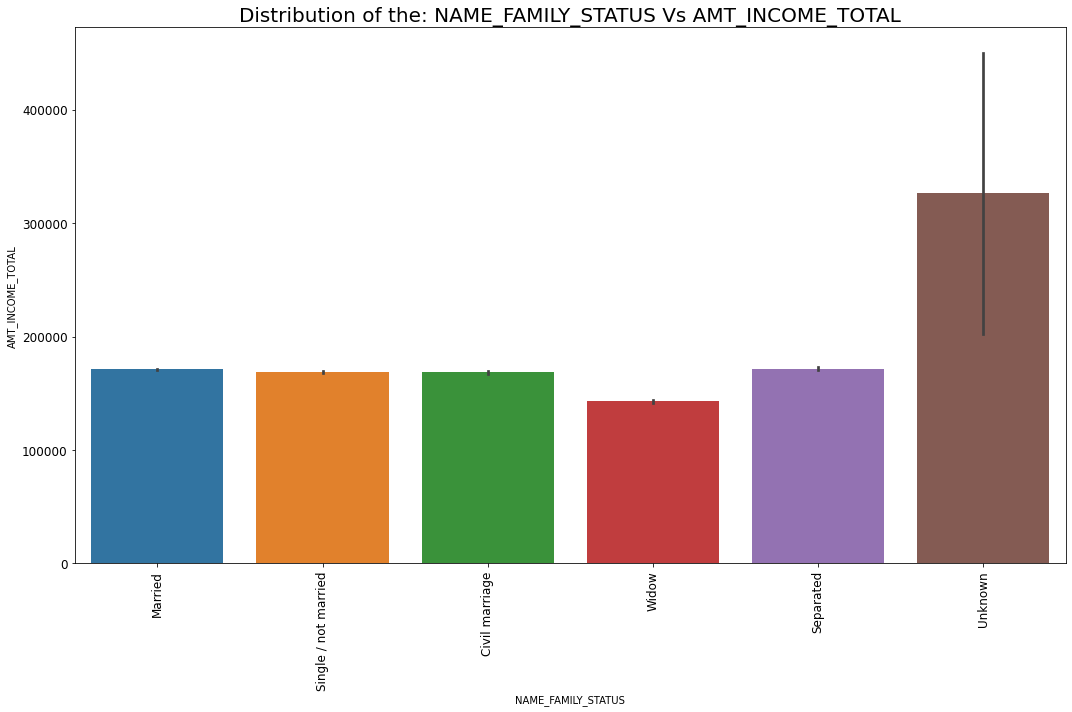

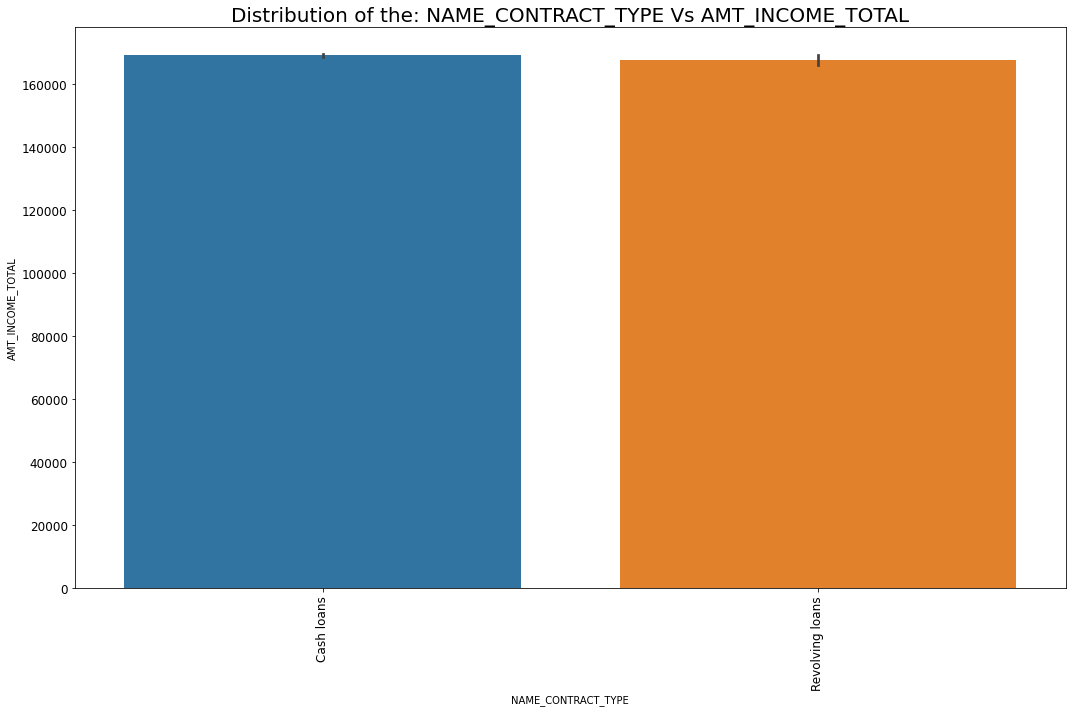

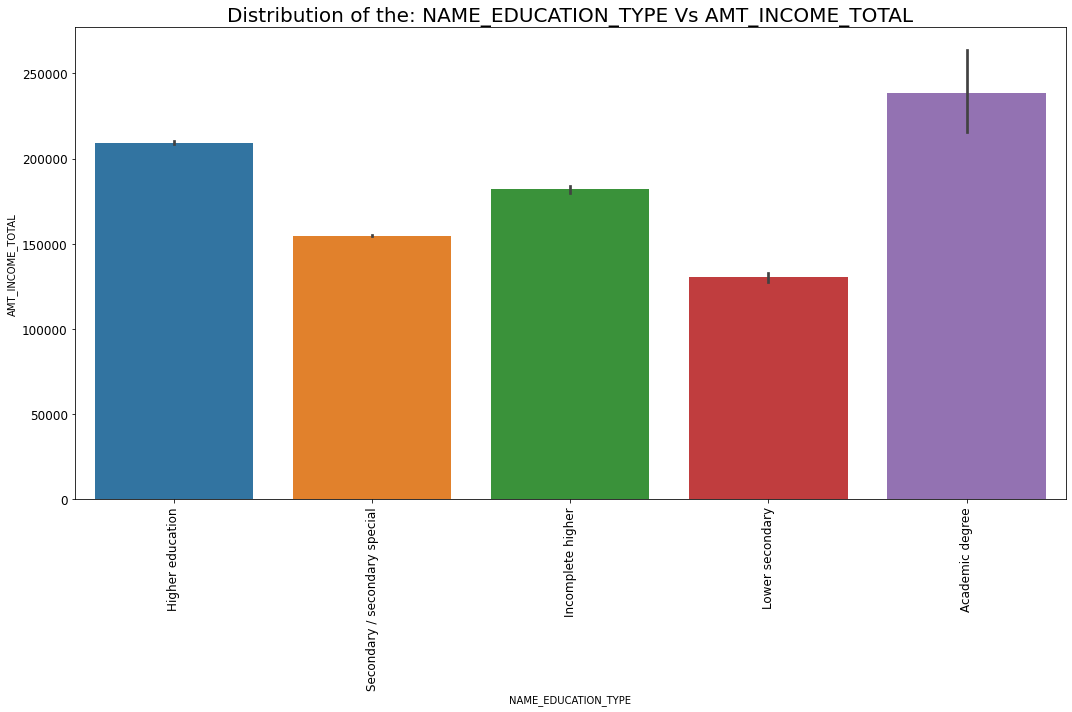

In [96]:
for column in req_categorical_col:
    plotting_catVsNum(train_0, column, 'AMT_INCOME_TOTAL')

- ***Observations***

1) **OCCUPATION_TYPE:** Accountants have the highest incomes


2) **NAME_INCOME_TYPE:** Businessman has the highest income


3) **ORGANIZATION_TYPE:**  Legal services 
    
    
4) **NAME_FAMILY_STATUS:** Income levels are similar barring Widow and unknown


5) **NAME_CONTRACT_TYPE:** Cash Loans and Revolving Loans are amost evenly split


6) **NAME_EDUCATION_TYPE:** Academic degree is highest

#### Bivariate Analysis Education vs Credit Amount

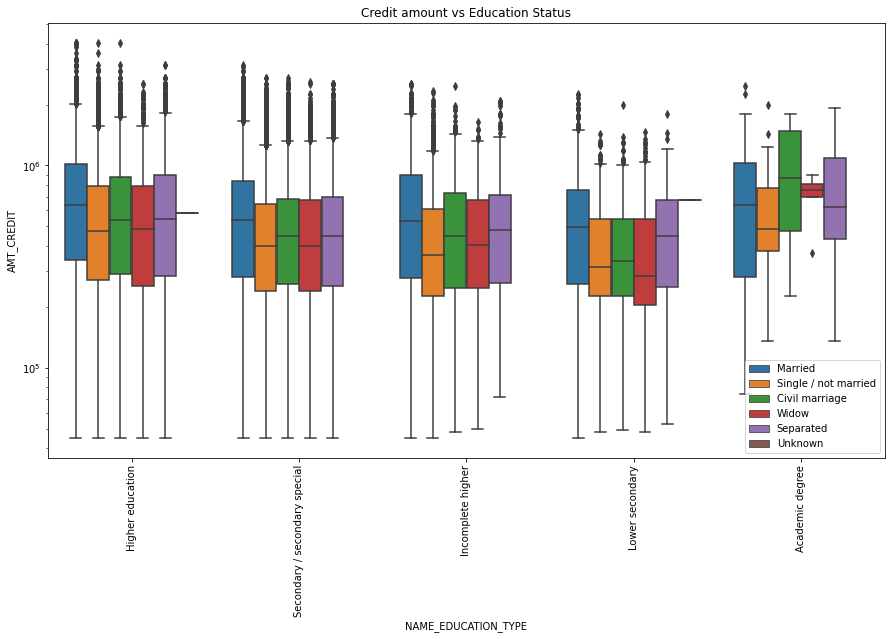

In [97]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(x=train_0['NAME_EDUCATION_TYPE'],y= train_0['AMT_CREDIT'], hue = train_0['NAME_FAMILY_STATUS'], orient='v')
plt.title('Credit amount vs Education Status')
plt.legend(loc = 'best')
plt.show()

- From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
- Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

#### Bivariate Analysis Income vs Education 

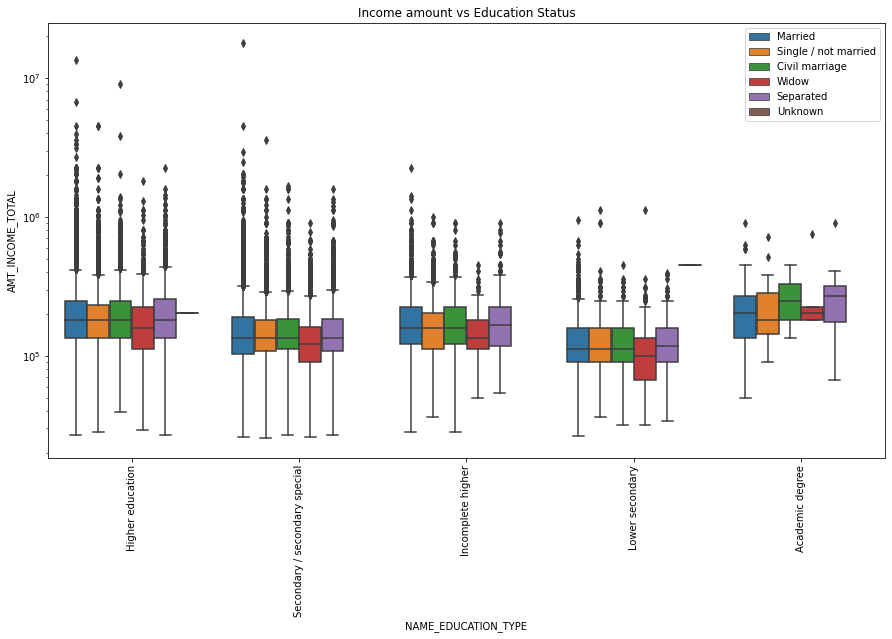

In [98]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = train_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.legend(loc = 'best')
plt.show()

- From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status, though there are many outliers. 
- Fewer outliers for Academic degree but the income amount is little higher that Higher education. 
- Lower secondary of civil marriage family status are have less income amount than others.

### MERGING both the DFs

In [99]:
#application_data
application_data_x = application_data[[i for i in application_data.columns if i not in ["TARGET"]]]

#previous_application_data
previous_application_data_x = previous_application_data[[i for i in previous_application_data.columns if i not in ["TARGET"]]]

application_data_x["type"] = "application_data"
previous_application_data_x["type"] = "previous_application"

#concat
res = pd.concat([application_data_x,previous_application_data_x], axis=0) 

#### Contract Type comparison

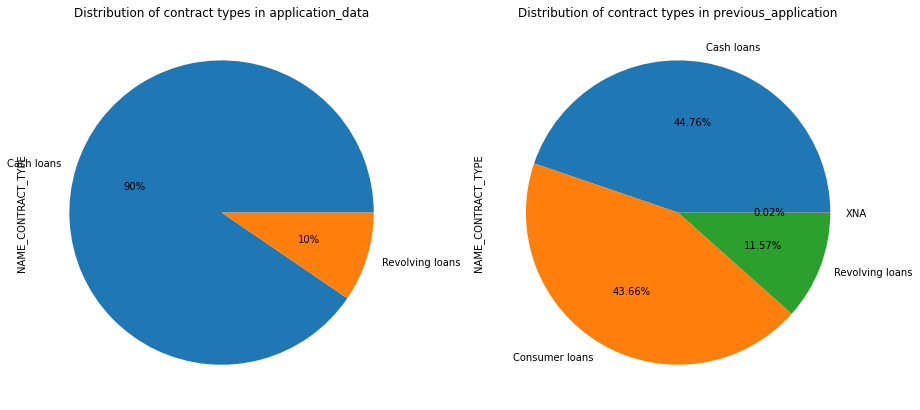

In [100]:
plt.figure(figsize=(15,8))

plt.subplot(121)

res[res["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.title("Distribution of contract types in application_data")

plt.subplot(122)

res[res["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%")

plt.title("Distribution of contract types in previous_application")


plt.show()

Observation: More loan types in previous application data

#### Scatter plot between credit amount and annuity amount

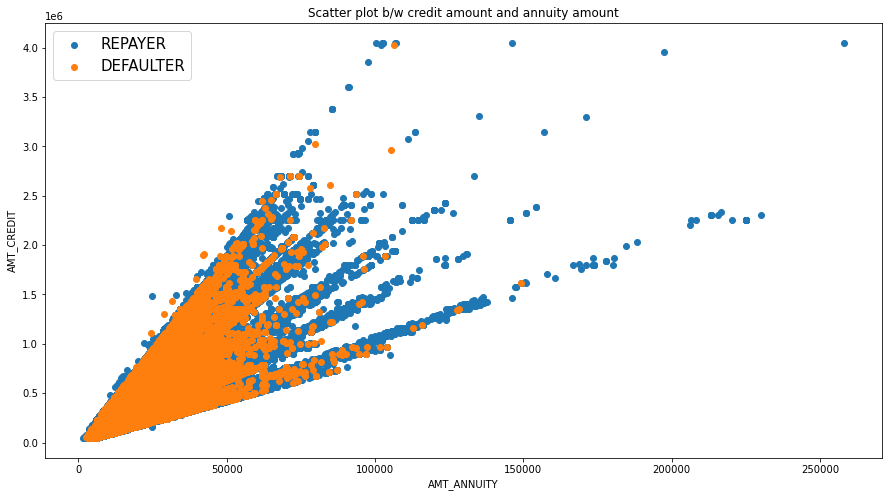

In [101]:
fig = plt.figure(figsize=(15,8))
#scatter for repayer ie Target 0
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'], application_data[application_data["TARGET"]==0]['AMT_CREDIT'], label="REPAYER")
#scatter for defaulter Target 1
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'], application_data[application_data["TARGET"]==1]['AMT_CREDIT'], label="DEFAULTER")
#legend
plt.legend(loc="best", prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot b/w credit amount and annuity amount")
plt.show()

Some positive correlation is observed, lets do a pair plot of all AMT cols

#### Pair Plot between amount variables

- AMT_INCOME_TOTAL - Income of the client
- AMT_CREDIT - Credit amount of the loan
- AMT_ANNUITY - Loan annuity
- AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which     the loan is given

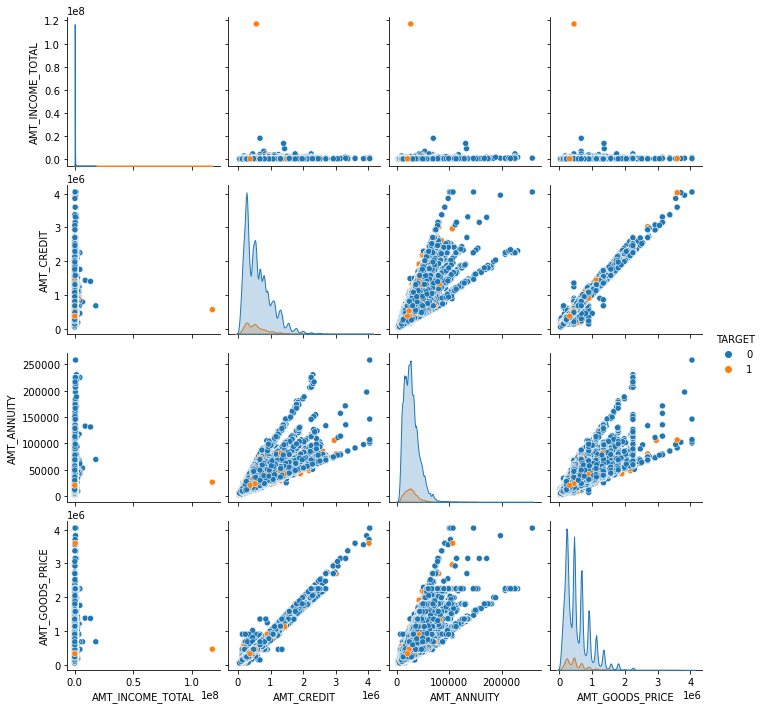

In [102]:
cols_amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
sns.pairplot(cols_amt,hue="TARGET")
plt.show()

#### Merging DFs using SK_ID_CURR

In [103]:
comb_df= pd.merge(application_data, previous_application_data, on='SK_ID_CURR', how='inner')

comb_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'], ascending=[True,True],inplace=True)
comb_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                           Y                       1                    XAP             Approved           -606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest
1      100003       0           Cash loans           F            N               N             0          270000

In [104]:
comb_df.drop_duplicates(subset='SK_ID_CURR', inplace=True, keep='last')
comb_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0       100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                           Y                       1                    XAP             Approved           -606                    XNA                XAP              New            Vehicles            POS               XNA                    Stone               500      Auto technology         24.0       low_normal      POS other with interest
2       100003       0           Cash loans           F            N               N             0          270000.0  

#### Correlation between variables

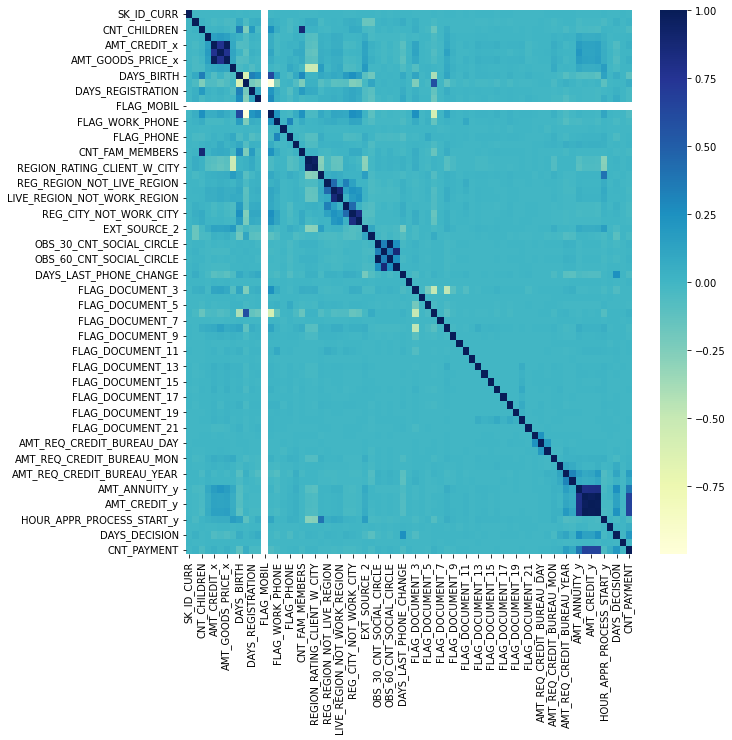

In [105]:
corr = comb_df.corr() 
  
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu") 
plt.show()

#### Top 10 Correlation fields 

In [106]:
correlation_2 = comb_df.corr().abs()
correlation_2 = correlation_2.unstack().sort_values(kind='quicksort')
correlation_2 = correlation_2.dropna()
correlation_2 = correlation_2[correlation_2 != 1.0 ]
print(correlation_2.tail(10))

AMT_CREDIT_x              AMT_GOODS_PRICE_x           0.986397
AMT_GOODS_PRICE_x         AMT_CREDIT_x                0.986397
AMT_CREDIT_y              AMT_GOODS_PRICE_y           0.992128
AMT_GOODS_PRICE_y         AMT_CREDIT_y                0.992128
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998503
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998503
FLAG_EMP_PHONE            DAYS_EMPLOYED               0.999772
DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999772
AMT_GOODS_PRICE_y         AMT_APPLICATION             0.999940
AMT_APPLICATION           AMT_GOODS_PRICE_y           0.999940
dtype: float64


#### Client's age Plots to check for trends

DAYS_BIRTH - Client's age in days at the time of application.

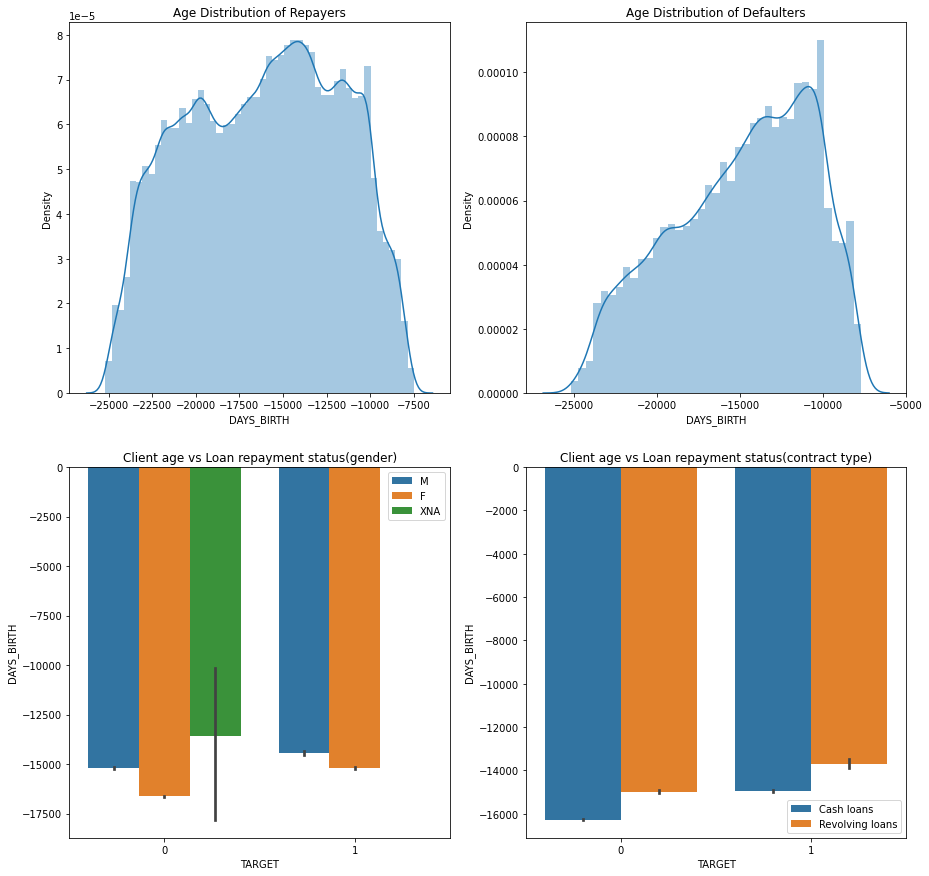

In [107]:
fig = plt.figure(figsize=(15,15))

plt.subplot(221)
sns.distplot(comb_df[comb_df["TARGET"]==0]["DAYS_BIRTH"])
plt.title("Age Distribution of Repayers")

plt.subplot(222)
sns.distplot(comb_df[comb_df["TARGET"]==1]["DAYS_BIRTH"])
plt.title("Age Distribution of Defaulters")

plt.subplot(223)
sns.barplot(comb_df["TARGET"], comb_df["DAYS_BIRTH"], hue=comb_df["CODE_GENDER"])
plt.legend(loc="best")
plt.title("Client age vs Loan repayment status(gender)")

plt.subplot(224)
sns.barplot(comb_df["TARGET"], comb_df["DAYS_BIRTH"], hue=comb_df["NAME_CONTRACT_TYPE_x"])
plt.legend(loc="best")
plt.title("Client age vs Loan repayment status(contract type)")

plt.show()

- Young people default more than older

#### Percentage of applications accepted,cancelled,refused and unused based on  different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, refused, unused) of previous application.

In [108]:

comb_df[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]

reason = pd.crosstab(comb_df["NAME_CASH_LOAN_PURPOSE"],comb_df["NAME_CONTRACT_STATUS"])
#Accepted %
reason["A"] = (reason["Approved"]*100)/(reason["Approved"]+reason["Canceled"]+reason["Refused"]+reason["Unused offer"])
#Cancelled %
reason["C"] = (reason["Canceled"]*100)/(reason["Approved"]+reason["Canceled"]+reason["Refused"]+reason["Unused offer"])
#Refused %
reason["R"] = (reason["Refused"]*100)/(reason["Approved"]+reason["Canceled"]+reason["Refused"]+reason["Unused offer"])
#Unused Offer %
reason["U"] = (reason["Unused offer"]*100)/(reason["Approved"]+reason["Canceled"]+reason["Refused"]+reason["Unused offer"])

reason_2 = reason[["A","C","R","U"]]
#Stack and reset index
reason_2 = reason_2.stack().reset_index()

reason_2["NAME_CONTRACT_STATUS"] = reason_2["NAME_CONTRACT_STATUS"].replace({"A":"Accepted_percentage","C":"Cancelled_percentage",
                                                               "R":"Refused_percentage","U":"Unused_percentage"})



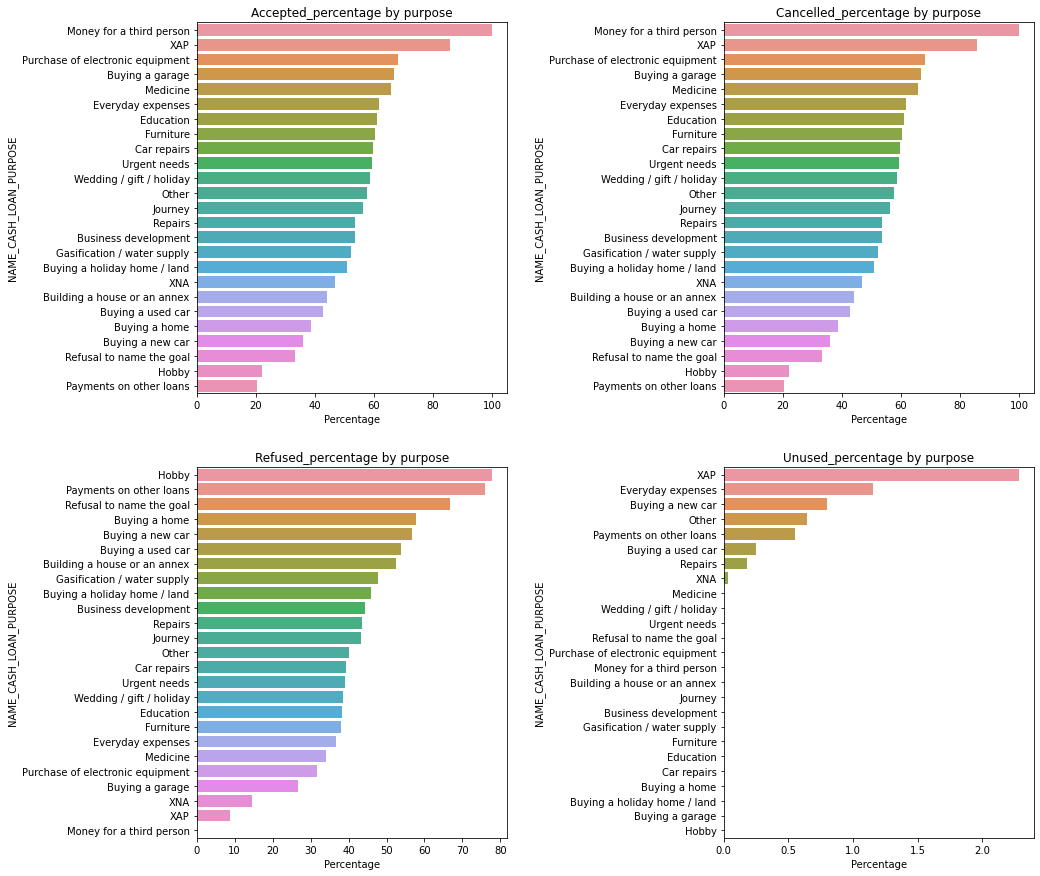

In [109]:
fig = plt.figure(figsize=(15,15))
#Accepted plot
plt.subplot(2,2,1)
data1 = reason_2[reason_2["NAME_CONTRACT_STATUS"] == "Accepted_percentage"]
ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=data1.sort_values(by=0,ascending=False))
plt.title("Accepted_percentage by purpose")
plt.xlabel("Percentage")
plt.subplots_adjust(wspace = .7)

#Cancelled Plot
plt.subplot(2,2,2)
data2 = reason_2[reason_2["NAME_CONTRACT_STATUS"] == "Cancelled_percentage"]
ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=data1.sort_values(by=0,ascending=False))
plt.title("Cancelled_percentage by purpose")
plt.xlabel("Percentage")   
plt.subplots_adjust(wspace = .7)

#Refused Plot
plt.subplot(2,2,3)
data1 = reason_2[reason_2["NAME_CONTRACT_STATUS"] == "Refused_percentage"]
ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=data1.sort_values(by=0,ascending=False))
plt.title("Refused_percentage by purpose")
plt.xlabel("Percentage")   
plt.subplots_adjust(wspace = .7)

#Cancelled Plot
plt.subplot(2,2,4)
data1 = reason_2[reason_2["NAME_CONTRACT_STATUS"] == "Unused_percentage"]
ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=data1.sort_values(by=0,ascending=False))
plt.title("Unused_percentage by purpose")
plt.xlabel("Percentage")   
plt.subplots_adjust(wspace = .7)

plt.show()

Observations:
- Money to a third person, XAP , prchase of electronic equipment ,medicine,    every day expenses and education have higher loan acceptance.
- 37.5% of XNA purpose loans are cancelled.
- Loan puporses like Hobby, Payment of other loans ,Refusal to name goal, Buying new home or car have higher rejections.
- XAP has has highest unused percentage

####  Application status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.

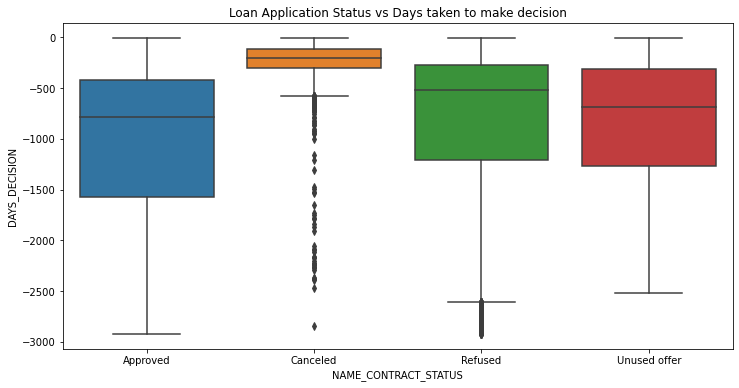

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(y= comb_df["DAYS_DECISION"],x = comb_df["NAME_CONTRACT_STATUS"])
plt.title("Loan Application Status vs Days taken to make decision")
plt.show()

It looks like on average approved applications have higher number of decision days compared to cancelled, refused applications.

### Conclusions

Since, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The following conlcusions were observed:
1. It is observed that people with higher levels of education apply for more loans and the default rate is very low, the company can should use this as a metric for risk of defaulting
2. Females apply for loans more than Males and have a lower defaulting rate
3. Owning a car has an inverse relationship with defaulting on loans whereas housing type of home has a direct relationship
4. Region rating is a possible indicator of defaulting
   - Region 2 has the most applications 
   - Region 3 has more defaulters 
   - Region 1 has more repayers 
5. More skilled jobs have lower defaulters Managers are getting high salary and Laborers are getting neither high nor low, to satisfy their family needs more laborers are taking loans. 
6. Higher Income and Educational levels have lower loans/default rates
7. Age is also a strong indicator of defaulting. Lower the age, higher the chances of deafaulting
8. Reason/Purpose for loan also shows a pattern: Education, medicine, equiment purchase have higher acceptance rates, whereas Hobby, Payment of other loans ,Refusal to name goal, Buying new home or car have higher rejections.
9. Days taken to approve loan are higher than refusal, cancels relative to previous application
10. There is a very correlation between 
    - Amt_credit vs Amt_Goods_Price 0.986397
    - Amt_Application vs Amt_Goods_Price 0.999940

The company can use the above mentioned variables to lower risk of defaulters and increase loan approvals to increase business!